In [34]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=6,4

In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
boston=load_boston()

In [38]:
type(boston)

sklearn.utils.Bunch

In [39]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [40]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [41]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
boston_shape=boston.data
boston_shape.shape

(506, 13)

In [43]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


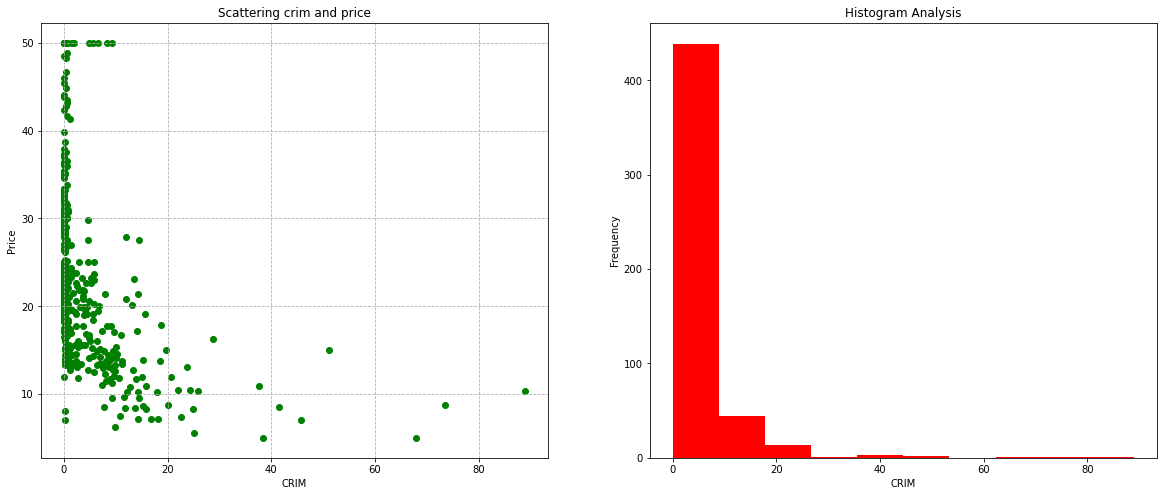

In [45]:
#crim and price compare
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
#scattering crim and price
ax[0].scatter(boston_df['CRIM'],boston_df['Price'],marker='o',color='green')
ax[0].grid(ls='--')
ax[0].set_xlabel('CRIM')
ax[0].set_ylabel('Price')
ax[0].set_title('Scattering crim and price')

#HISTOGRAM aNALYSIS:
ax[1].hist(boston_df['CRIM'],color='Red')
ax[1].set_xlabel('CRIM')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram Analysis')

plt.show()



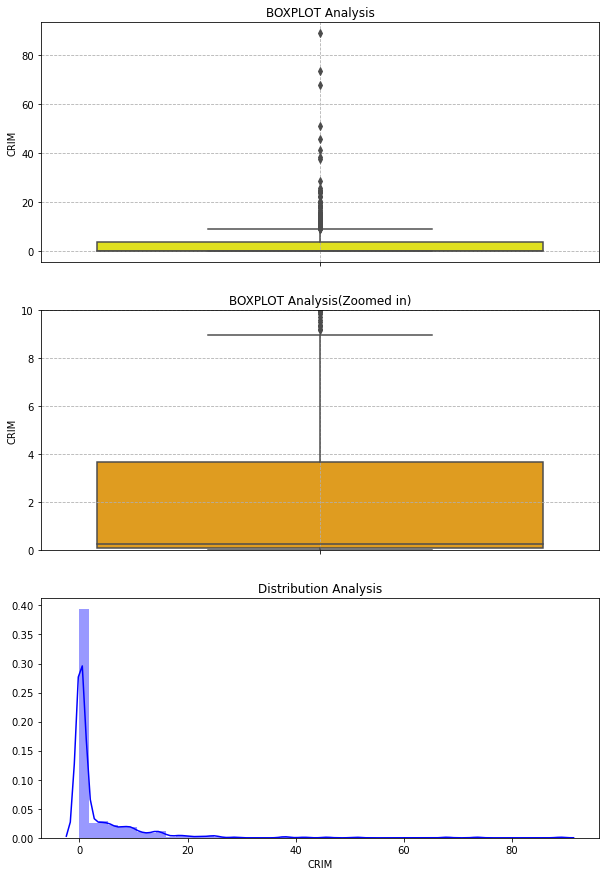

In [46]:
#zooming the CRIM 
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=((10,15)))
#boxplot:
sns.boxplot(y=boston_df['CRIM'],ax=ax[0],color='yellow')
ax[0].grid(ls='--')
ax[0].set_title('BOXPLOT Analysis')

#zommed in box plot:
sns.boxplot(y=boston_df['CRIM'],ax=ax[1],color='orange') 
ax[1].grid(ls='--')
ax[1].set_title('BOXPLOT Analysis(Zoomed in)')
ax[1].set_ylim([0,10])

#distribution
sns.distplot(boston_df['CRIM'],ax=ax[2],color='blue')
ax[2].set_title('Distribution Analysis')
plt.show()

In [47]:
#ZN
boston_df['ZN'].head(10)

0    18.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6    12.5
7    12.5
8    12.5
9    12.5
Name: ZN, dtype: float64

In [48]:
boston_df['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

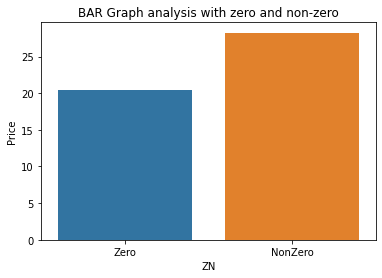

In [49]:
values=['Zero','NonZero']
frequencies=[boston_df[boston_df['ZN']==0]['Price'].mean(),boston_df[boston_df['ZN']!=0]['Price'].mean()]
sns.barplot(values,frequencies)
plt.xlabel('ZN')
plt.ylabel('Price')
plt.title('BAR Graph analysis with zero and non-zero')
plt.show()

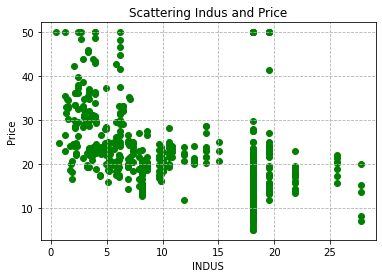

In [51]:
#indus
plt.scatter(boston_df['INDUS'],boston_df['Price'],color='Green')
plt.xlabel('INDUS')
plt.ylabel('Price')
plt.title('Scattering Indus and Price')
plt.grid(ls='--')
plt.show()

In [55]:
#Chas
boston_df['CHAS'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: CHAS, dtype: float64

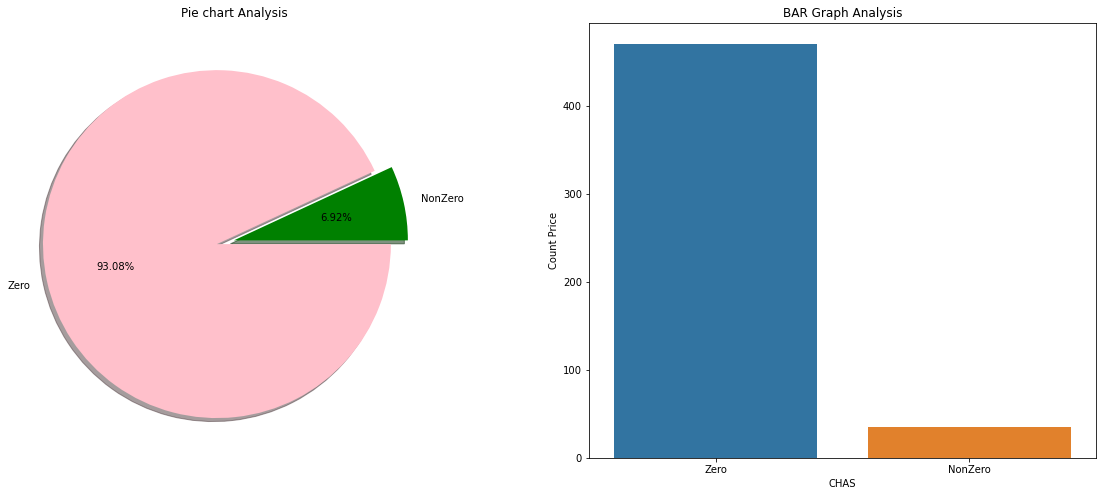

In [57]:
value=['Zero','One']
frequencies=[boston_df[boston_df['CHAS']==0].shape[0],boston_df[boston_df['CHAS']==1].shape[0]]
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.pie(frequencies,labels=values,colors=['pink','green'],explode=[0.1,0],counterclock=False,autopct='%.2f%%',shadow=True)
plt.title('Pie chart Analysis')
fig.add_subplot(1,2,2)
sns.barplot(values,frequencies)
plt.xlabel('CHAS')
plt.ylabel('Count Price')
plt.title('BAR Graph Analysis')
plt.show()


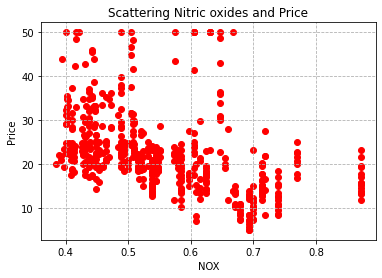

In [58]:
#indus
plt.scatter(boston_df['NOX'],boston_df['Price'],color='red')
plt.xlabel('NOX')
plt.ylabel('Price')
plt.title('Scattering Nitric oxides and Price')
plt.grid(ls='--')
plt.show()

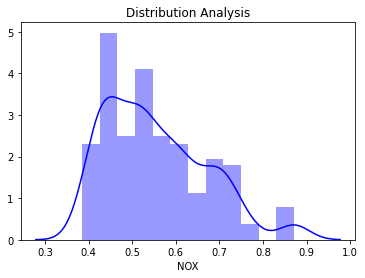

In [59]:
sns.distplot(boston_df['NOX'],color='Blue')
plt.title('Distribution Analysis')
plt.show()

In [65]:
boston_df[['RM','Price']].describe()

,RM,Price
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


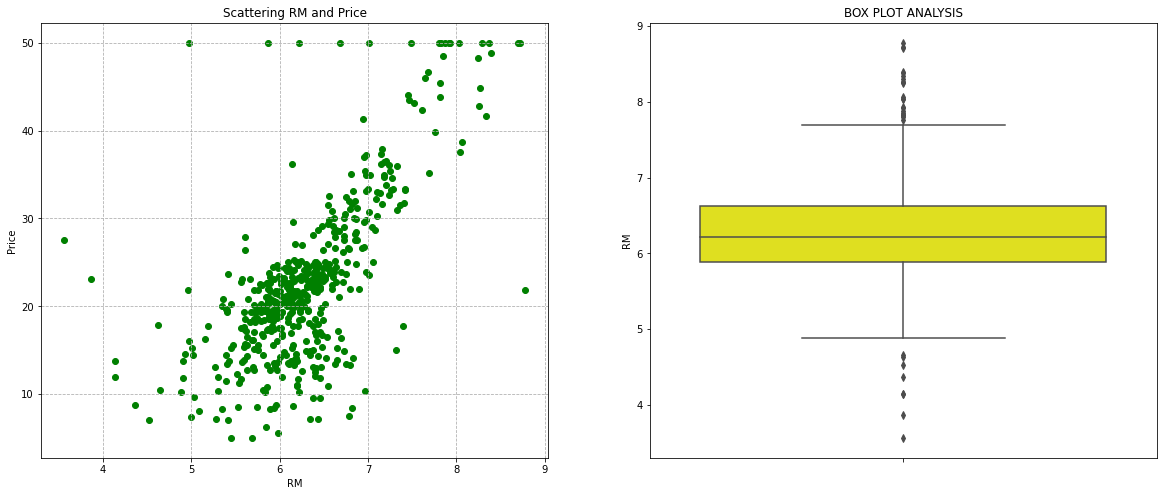

In [60]:
#ROOM Analysis
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.scatter(boston_df['RM'],boston_df['Price'],color='green')
plt.title('Scattering RM and Price')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid(ls='--')

#boxplot
fig.add_subplot(1,2,2)
sns.boxplot(y=boston_df['RM'],color='Yellow')
plt.title('BOX PLOT ANALYSIS')
plt.show()

In [67]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

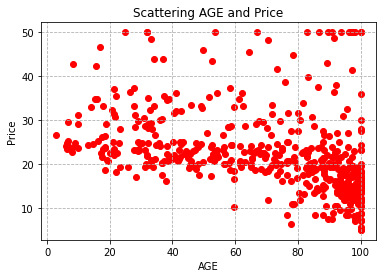

In [68]:
#indus
plt.scatter(boston_df['AGE'],boston_df['Price'],color='red')
plt.xlabel('AGE')
plt.ylabel('Price')
plt.title('Scattering AGE and Price')
plt.grid(ls='--')
plt.show()

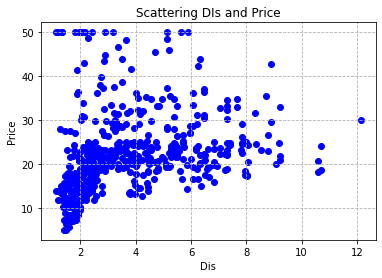

In [70]:
#indus
plt.scatter(boston_df['DIS'],boston_df['Price'],color='blue')
plt.xlabel('Dis')
plt.ylabel('Price')
plt.title('Scattering DIs and Price')
plt.grid(ls='--')
plt.show()

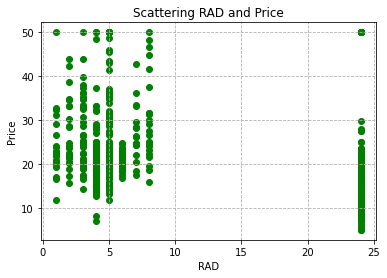

In [72]:
#indus
plt.scatter(boston_df['RAD'],boston_df['Price'],color='green')
plt.xlabel('RAD')
plt.ylabel('Price')
plt.title('Scattering RAD and Price')
plt.grid(ls='--')
plt.show()

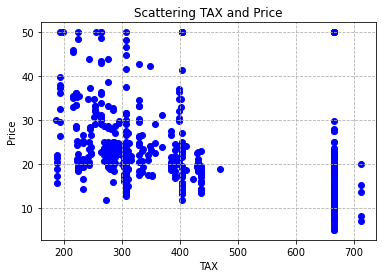

In [73]:
#indus
plt.scatter(boston_df['TAX'],boston_df['Price'],color='blue')
plt.xlabel('TAX')
plt.ylabel('Price')
plt.title('Scattering TAX and Price')
plt.grid(ls='--')
plt.show()

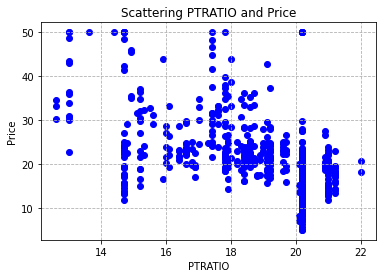

In [74]:
#indus
plt.scatter(boston_df['PTRATIO'],boston_df['Price'],color='blue')
plt.xlabel('PTRATIO')
plt.ylabel('Price')
plt.title('Scattering PTRATIO and Price')
plt.grid(ls='--')
plt.show()

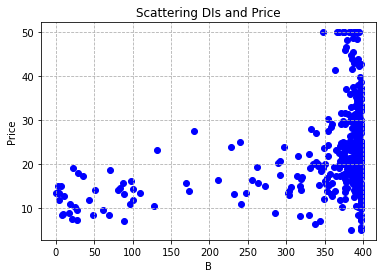

In [75]:
#indus
plt.scatter(boston_df['B'],boston_df['Price'],color='blue')
plt.xlabel('B')
plt.ylabel('Price')
plt.title('Scattering DIs and Price')
plt.grid(ls='--')
plt.show()

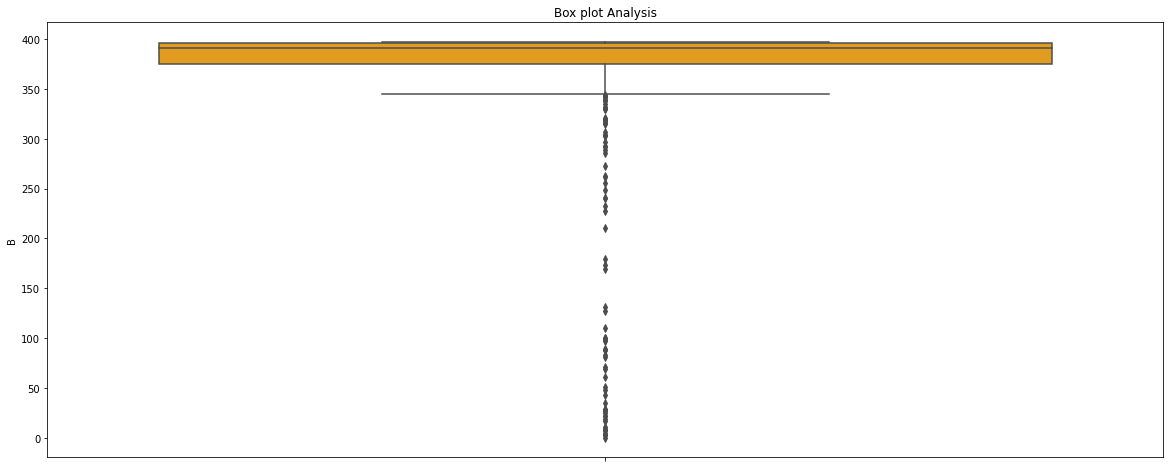

In [77]:
fig=plt.figure(figsize=(20,8))
sns.boxplot(y=boston_df['B'],color='orange')
plt.title('Box plot Analysis')
plt.show()

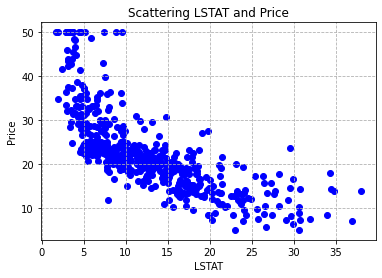

In [78]:
#indus
plt.scatter(boston_df['LSTAT'],boston_df['Price'],color='blue')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.title('Scattering LSTAT and Price')
plt.grid(ls='--')
plt.show()

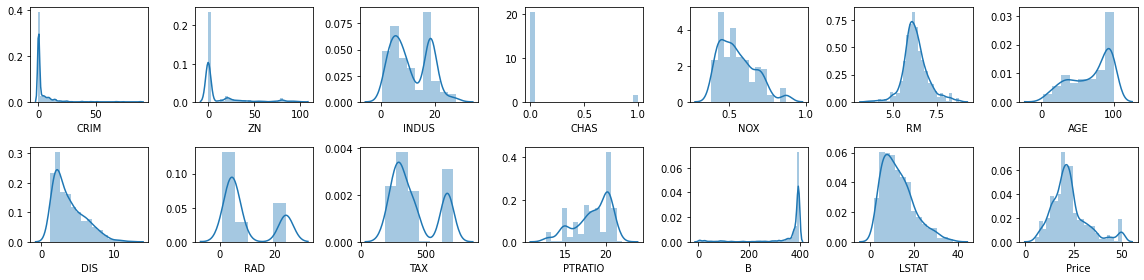

In [81]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=boston_df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(boston_df[col[index]],ax=ax[i][j])
        index=index+1data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABHgAAAEYCAYAAAAnPkG+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3zkdbX4/9eZlt7bpmdLtvddtrB0BBcUEGyAIqJcLle8V73Yf7+vD7/X67Veu4KIKChFqiIuIH1p23uv6dn0Pkmmvb9/zCRks9nNpExJcp6PRx6bfD6fmTmBycx8zue8zxFjDEoppZRSSimllFJq4rJEOgCllFJKKaWUUkopNTaa4FFKKaWUUkoppZSa4DTBo5RSSimllFJKKTXBaYJHKaWUUkoppZRSaoLTBI9SSimllFJKKaXUBKcJHqWUUkoppZRSSqkJzhbMQSKyHvg5YAXuN8Z8/yzHnQdsAj5ujHnyXPeZmZlpSkpKRhatinrbt29vNMZkRTqO0dDn5OSkz0kVbfQ5qaKNPidVtJmoz0l9Pk5e+pxU0eZsz8lhEzwiYgV+DVwBVAFbReRZY8yBIY77AfBiMAGVlJSwbdu2YA5VE4iIlEc6htHS5+TkpM9JFW30OamijT4nVbSZqM9JfT5OXvqcVNHmbM/JYJZorQKOGWNOGGNcwGPAdUMc9+/AU0D9qKNUSimllFJKKaWUUiMWTIInH6gc8HNVYFs/EckHrgfuPdcdicgdIrJNRLY1NDSMNFallFJKKaWUUkopNYRgEjwyxDYz6OefAV8zxnjPdUfGmPuMMSuNMSuzsibcEkallFJqwhGRQhF5TUQOish+EflCYHu6iLwkIkcD/6ZFOlallFJKKTV6wTRZrgIKB/xcANQMOmYl8JiIAGQCV4uIxxjz19EG9sjmCgBuXl002rtQKuT6nqegz1WlxtPAv62h6N/biHiAu40xO0QkCdguIi8BnwZeMcZ8X0S+Dnwd+NpI73yo/1f6/0dNVmd7bdLnvJpK9POvmuqG+5wKkfvbCKaCZytQKiLTRcQB3Ag8O/AAY8x0Y0yJMaYEeBL43FiSO0oppZQaH8aYWmPMjsD3HcBB/EutrwMeDBz2IPChyESolFJKTR0isl5EDovIscAFlsH7RUR+Edi/R0SWB7bHisgWEdkdqMj9v+GPXkW7YRM8xhgP8Hn807EOAo8bY/aLyJ0icmeoA1RKKaXU+BCREmAZsBnIMcbUgj8JBGSf5TbaP08ppZQaBwMmVF8FzAduEpH5gw67CigNfN0B3BPY3gtcZoxZAiwF1ovImrAEriaMYJZoYYzZAGwYtG3IhsrGmE+PPSyllFJKjScRScQ/7fKLxpj2wLLqYRlj7gPuA1i5cuXgHnxKKaWUCl7/hGoAEembUH1gwDHXAQ8ZYwywSURSRSQ3cDGmM3CMPfCl78vqNMEs0VJKKaXUBCYidvzJnYeNMU8HNteJSG5gfy5QH6n4lFJKqSli2AnV5zpGRKwisgv/e/ZLxpjNgx9AK2+nNk3wKKWUUpOY+Et1fg8cNMb8ZMCuZ4FbA9/fCvwt3LEppVSoBdHv5CsisivwtU9EvCKSHthXJiJ7A/u2hT96NQkFM6H6rMcYY7zGmKX4Bx+tEpGFZxyok6untKCWaCmllFJqwloH3ALsDVz1A/gm8H3gcRH5LFABfDRC8SmlVEgM6HdyBf4qiK0i8qwxpn85jDHmR8CPAsdfA3zJGNM84G4uNcY0hjFsNbkFM6F62GOMMa0i8jqwHtg3/mGqiUoTPEoppdQkZox5i6GvBgJcHs5YlFIqzILpdzLQTcCjYYpNTU39E6qBavwTqm8edMyzwOcDz9fVQJsxplZEsgB3ILkTB7wP+EEYY1cTgC7RUkqpQcYwvnLOgDLvXSLSLiJfDOz7tohUD9h3dbh/L6WUUmqKCabfCQAiEo+/GuKpAZsN8E8R2S4id5zldlOq30lzl4tetzfSYUxYQU6o3gCcAI4BvwM+F9ieC7wmInvwJ4peMsY8F9ZfQEU9reBRSqkBginn5vTxlavxj69cbYw5jH9sZd/9VAPPDLjdT40xPw79b6GUUkopgut30uca4O1By7PWGWNqRCQbeElEDhljNp52Z1No0uDTO6r48hO7sVqET60tYWZWYqRDmpCGm1AdmJ511xC32wMsC3mAakLTCh41IQVRYfGJQGXFHhF5R0SWRCJONSH1l3MbY1xAXzn3QP3jK40xm4DUvmlEA1wOHDfGlIc+ZKWUUkoNIZh+J31uZNDyLGNMTeDfevwXbFaFIMYJob6jh28+s5cVxWmkxTt4eHM5zl5PpMNSSg2iCR414QyosLgKmA/cJCLzBx12ErjYGLMY+A6BKytKBWFM4ysHOOODIv711HtE5AERSRvqwadaqbdSSikVQv39TkTEgf+9+dnBB4lICnAxA6YJikiCiCT1fQ9cyRRuZvvc7lp63D6+d8MiblpVRK/bx6uH6yMdllJqEE3wqIlo2AoLY8w7xpiWwI+b8F+xUSoYYxpfCRD4EHkt8MSA/fcAM/Ev4aoF/neoB9fRlkoppdT4CLLfCcD1wD+NMV0DtuUAb4nIbmAL8A9jzAvhij3aPPD2SfJSYtlysoWc5FiWFaWxtayZVqcr0qEppQbQHjxqIhqqemL1OY7/LPD8UDsCDfPuACgqKhqv+NTENh7jK68Cdhhj6vo2DPxeRH4HaFM8pZRSKsSG63cS+PmPwB8HbTsB6BJ/oNXpoqqlm/fNy+nftm5WBjsqWvjL1kr+9eKZEYxOKTWQJnjURBR0wzwRuRR/gueCofZPpcZ4KmijHl85YP8ZY1ZFJHfAMdcTxWXej2yuGPaYm1drQlQpFRqBpdjbgGpjzAcjHY9SU93OilYASjLi+7flpsRRnBHPX7ZVcsdFMxAZ6uO5UircdImWmoiCapgnIouB+4HrjDFNYYpNTXBjHF/ZN2b1CuDpQXf9QxHZGxhteSnwpdD+JkopNWF9Af/rr1IqCuyoaMEiUJAWf9r25UVpnGjo4ocvHA7q4pBSKvS0gkdNRMNWWIhIEf4T7FuMMUfCH6KayEY7vjKwzwlkDLH9lnEOUymlJh0RKQA+AHwX+M8IhzNmZzvp1SpINZHsqGhhWnIsDtvptQGL8lP4++4adle1Upgef5ZbK6XCSSt41IQTZIXFt/CfZP9GRHaJyLYIhauUUkqp4P0M+Crgi3QgSikwxnCgpp281Lgz9sXarczKTuRATTv+a19KqUjTCh41IQVRYXE7cHu441JKKaXU6IjIB4F6Y8x2EbnkHMfpgASlwqSx00WL001OcuyQ+xfkpXDoVAfVrd1hjkwpNRSt4FFKKaWUUtFgHXCtiJQBjwGXicifBx9kjLnPGLPSGLMyKysr3DEqNaUcresAOGuCZ+60JAQ4HDhOKRVZmuBRSimllFIRZ4z5hjGmwBhTgr+/3qvGmE9GOCylprQj/QmemCH3J8TYyE+L42hdZzjDUkqdRdQmePZWt/W/oCillFJKKaWUCq8j9Z2kxttJjDl7Z4/S7CQqm520Od1hjEwpNZSoTfA8uqWCP75TFukwlFJKKaVUmBljXjfGfDDScSg11ZU1djEjMwEROesxM7MTMMC28ubwBaaUGlJUNllu6XJFOgSllFJAc5eLv++u4WRjFxmJDq6cP40505IiHZZSSimlQuyRzRUcqG2nJCPhnMcVpMZjEdhW3sLl83LCFJ1SaihRWcGzv6Y90iEopdSU19bt5r6Nxylr6mJZUSoen+HBd8vYWdES6dCUUkopFWIen482p5v0BMc5j3PYLOSlxrG9TD8fKBVpUZrgaQMgJc4e4UiUUmpqMsbwxPZKej0+7rhoBtctzefzl85iRlYCT++o5kCEEvFen+FofQc9bm9EHl8ppZSaKlqdbgwMm+ABKE6PZ3dVKy6PL/SBKaXOKioTPEfr/V3Y7daoDE8ppSa9fTXtnGjo4v0LppGbEgf4X5NvPq+IOIeVrz61G5/PhDUmj8/Hg++U8Ye3y7jypxtpdepyXqVU5Hi8Pjw+PZlVk1dzoG1GenwQCZ6MBHo9PvYFLtQrpSIjKjMo3YErs15901RKqbAzxvD64XqyEmNYNT39tH3xMTY+sCiXfdXt/HVXdVjj2l3ZyrGGTtbNzKCyxclvXj8e1sdXSimAVqeLP7x9km89u5//+vsB/vRuGZtPNGFMeJPeSoVaf4InMZgETzyALtNSKsKiMsHTV9rn8eobpVJKhdvxhi5q23q4aHYWliGmZiwqSGFRfgo/f+Uo3jBV8Rhj2Hi0kdyUWK5elMv1S/N56N0ynC5PWB5fKaUAnL0e7n/rJBXNTi6encXq6emUNzv5+H2b+NBv3uG5PTW6hFRNGs1dLuxWIekcI9L7JMXaKUqP10laSkVYVCZ43N5AgifM5f9KKaVga1kzcXYriwtShtxvEeHOi2dS3uTklYN1YYmprr2Xho5eVk/PQET46MpCetw+XjvUEJbHV0opgBcP1NHqdHHb+SW8f8E0PrA4j6++fy7f+dBCWp0uPv/ITlZ85yXuengHT22voleTPWoCa+5ykRbvOOeI9IFWFqexo6JVq9mGISLrReSwiBwTka8PsV9E5BeB/XtEZHlge6GIvCYiB0Vkv4h8IfzRq2gX5QkeXaKllFLh1Nbt5kBtO0sLU8/ZB+39C3LIT43j/rdOhiWuQ6f8TZ3n5vpHtK+ank5mYgwb9tWG5fGVUqqssYttZc2snZFB0YCx0Q6bhVvWFPPq3Zfwp8+u4tql+Wwta+buJ3bzgxcP8dKBuv7PtkpNJM1drqAaLPdZXJBCQ0cvp9p7QhjVxCYiVuDXwFXAfOAmEZk/6LCrgNLA1x3APYHtHuBuY8w8YA1w1xC3VVNcVCZ4Bi7R0gywUkqFz+uH6/H6DEvOUr3Tx2a1cNu6EracbGZPVWvI4zp0qoP81DiSY/3TFa0W4dI5Wbx9rDHszZ6VUlPTQ++WYxHhwtlZQ+63WoQLS7P43g2L2PSNy3nq39YyIzOR1w7Xc8/rx2nrdoc5YqVGzxhDc5eLjJEkeApTAdhTpY2Wz2EVcMwYc8IY4wIeA64bdMx1wEPGbxOQKiK5xphaY8wOAGNMB3AQyA9n8Cr6RWeCJ9B7x6DLtJRSKpxeOlBHQoyNgvT4YY/92HmFxNmtPLqlIqQxuTw+qlqczMpOPG37mhkZtDrdHK7rCOnjK6WUy+Pjye2VLMhP7k80n4vFIqwoTueTa4q5dW0JLU4Xv3vzBM5e7RsWbkEsh7lERNpEZFfg61vB3nYya+x04fL6SBtBgmd+bjI2i4Tlws8Elg9UDvi5ijOTNMMeIyIlwDJg87hHqCa0qEzwuD3vlbG6PFrSqpRS4eDy+HjjcAPzpiUN2Vx5sORYO1ctmsZzu2tD2lS0qsWJz7w3oaPP6hn+CV+bTjSF7LGVUgrgrWMNtPd4WBaoUBiJOdOS+PT5JbR1u3l4S4W2IAijIJfDALxpjFka+PqvEd52UqpodgKMqIIn1m5ldk6SVvCc21AfsAZXNJzzGBFJBJ4CvmiMaT/jAUTuEJFtIrKtoUF7FU41UZngcXk1waOUipzRNr8L7CsTkb2Bq4DbBmxPF5GXRORo4N+0cP0+wdp8somOXg/zcpODvs1HlhfQ0evhnwdC12y5rKkLAYrTE07bXpAWT35qHNt0JKtSKsQ27D1FUqyNmYMqCYNVnJHADcvyOdnYxYv7To1zdOocglkOE4rbTngVzV0AI6rgAVhSmMKeqjZts3F2VUDhgJ8LgJpgjxERO/7kzsPGmKeHegBjzH3GmJXGmJVZWUMvKVWTV1QmeAY2ouvVBI9SKozG2Pyuz6WBq4ArB2z7OvCKMaYUeCXwc1R5+UAdsXYLM7OCP4FZMyOD/NQ4ntxeFbK4Kpu7yUqKIc5hPWPf4oIU9tXolUKlVOgYY3jjSAOXzMnGZhn9R+dlRWmsnp7OO8eb2HJSR0mHSTDLYQDWishuEXleRBaM5LaTtVqioqkbAdLiR5bgWZSfSlu3u78CSJ1hK1AqItNFxAHcCDw76JhngU8FLiiuAdqMMbXiH2f2e+CgMeYn4Q1bDcUYQ4vThTeK2spEZ4LH4+uvS9MKHqVUmI26+d0w93sd8GDg+weBD41n0OPhjSMNrJuZicMW/FuDxSLcsDyft442UB+iqRm1bd3kp8YNuW9hfgrlTU5tXqqUCpkTjV00dPSydkbGmO9r/cJppCU4+MqTu3G6tB9PGASzHGYHUGyMWQL8EvjrCG47aaslypu7SI6zn3Oi5lAWB4Y06DKtoRljPMDngRfxN0l+3BizX0TuFJE7A4dtAE4Ax4DfAZ8LbF8H3AJcNqBn1NXh/Q1Un+YuF7967Rg/evEw33v+IMfqOyMdEhClCR6X10eM3R9aryd0fR2UUmoIY21+Z4B/ish2EbljwDE5xphagMC/2eMa9RidauuhrMnJ2pkjP4G5bmkePgMv7B//ZQedvR7aezzkpsQOuX9hvv+D5P5q/SCplAqNd4/7+3yN5vVxsBiblQ8vL6C8yckPnj805vtTwxp2OYwxpt0Y0xn4fgNgF5HMYG47mVU2O0c0Ir3PnGlJOGwWbbR8DsaYDcaY2caYmcaY7wa23WuMuTfwvTHG3BXYv8gYsy2w/S1jjBhjFg/oGbUhkr/LVOXs9fC7N0/Q6nRz9cJpJMXa+NOmMpo6eyMdWpQmeDw+Ymz+UnxdoqWUCrOxNr9bZ4xZjn8Z110ictGIHjxCpd6bT/pPYNaM4gr1rOwkSrMT+cee2vEOi9q2bgByz1bBk+fvF6TLtJRSofLuiSamJcdSkjH8dMFgTM9M4LZ1JTz4bjlvH2scl/tUZzXschgRmRZY+oKIrMJ/ftQUzG0ns/ImJ+kjXJ4FYLdamJ+bzG6t4FGT2LN7aujs8XDbuhIuKM3itvOnY7UIz+6OfA7YFukAhuL2GpJiNcGjlIqIMTW/M8b0/VsvIs/gX/K1EagTkdzAGupcoH6oBzfG3AfcB7By5cqQLOh9ZPOZY82f2VlFrN3CrsrWoCZoDXb1olx+8epR6jt6yE4autpmNGpb/cu+cpOHvs+MxBjyUmLZW33GEAmllBozYwybTzRxYWkWMorXxrP56vvn8saRBr78xG5e+OJFpMQNP3pdjZwxxiMifcthrMADfcthAvvvBT4C/JuIeIBu4Ebj7xA85G0j8ouEWbfLS31HL0tGODWu7/NFrN3K3qpWvD6D1TJ+fzdKRYN91W3sqWrj0jlZFKT5E//JcXYumZ3NC/tPUd3STX7a0BcmwyE6K3i8PmLt/gSP9uBRSoXZWJrfJYhIEoCIJABXAvsG3ObWwPe3An8L9S8yEicbuyjJSBhVcgfgA4tzMYZxnw5T29ZNSpyd+JizX49YmJ+iS7SUUiFxrL6Txk7XuPTfGSjOYeUnH1tKfUcv//fZKZEziJgglsP8yhizwBizxBizxhjzzrluOxVUtvgbJI+mggegIC2OLpeXEw3R0ZNEqfH0v/88TJzdyoWlp/fcWjU9nRibhbePR7YyM6gETxAjgz8RGBW8R0TeEZElow3I6zN4fYYYm/bgUUqF3xib3+UAb4nIbmAL8A9jzAuBfd8HrhCRo8AVgZ+jQnu3m8ZOF9MzE4Y/+CxKsxOZmZXAhr3jneDpOWv/nT4L81M40dhFR482WlZKja9NgWlXo1m+Opylhancdeksnt5ZzYa947/EVanRqmgKJHhG0YMH6B+MoMu01GSzvbyF1w43cFFpZn9BSp9Yu5UlBansr2mLaA5j2CVaA0YGX4F/WcJWEXnWGHNgwGEngYuNMS0ichX+5QWrRxNQ34j0GK3gUUpFSKBh3YZB2+4d8L0B7hridieAIRPcxpgm4PLxjXR8nGzsAmBGZvDj0QcTET6wKJdfvXaMxs5eMhNjxhyX2+ujoaOXBXkp5zxuUV+j5Zr2kJyEKaWmrt2VrWQmOihMD025/b9fNos3Dtfz1Sf3MDsniVnZo38dVmq8lDePLcGTlRRDgsO/TOsjKwrGMzSlIuq+jcdJi7ezdmbmkPuXFqaypayZAzWRax0QTAXPsCODjTHvGGNaAj9uwt+PYlRcgQRPbH8FjyZ4lFIqlMqbnTisFqYNUykznKsX5/qnaY3TMq269h4MDFvBMz/QaPlgrfbhGYqIPCAi9SKyb8C2dBF5SUSOBv5Ni2SMSkWrfdVtLMxPGdf+OwPZrRbu+eQKYmwW7nhoG+1aiaiiQGWzk8QYG/EO6/AHD8EiwsL8FK3gUZNKdWs3Lx2o48ZVRThsQ6dRijLiSY61cehUR5ije08wCZ5gRgYP9Fng+aF2BDMdxh1I6PQt0dIKHqWUCq3KZicFaXFjboQ4JyeJGVkJPL9vfJYa9DVYzjvLBK0+2UkxpCc4NMFzdn8E1g/a9nXgFWNMKfBK4Gel1AA9bi9H6ztZOEwV4Vjlpcbxm08sp6LZyX/+ZRc+X0j66ysVtPKmLorS48eU2FxckMKB2vb+1RlKTXSPbC4H4BOri856jEWE0uwkjtV34onQcz+YKVrBjAz2HyhyKf4EzwVD7Q9mOozb69/ct0RLK3iUUip03F4ftW3dZzSKGw0RYf2Cafx24wlaulykjbK0u09NWzcxNgtp8eeeLiMizMtN4mBt5K6WRDNjzEYRKRm0+TrgksD3DwKvA18LW1BKTQAHa9vx+gwL84dP8Aw1nXCkx1+1cBp/31PLT18+wt1XzhnR/Sk1niqanZRmJ43pPhYXpOLynOTwqY6g/oaUimY9bi+Pbqnk8nk5/ZOzzqY0J5HtFS3srmpjRXH4C6SDSfAEMzIYEVkM3A9cFeg1MSquMyp4tMmyUkqFSk1rNz4DhcO8WQ12tpMZQfD6DC8frOOjKwuHPCZY/gbLcUFdQZw3LZmHNpXj8fqwWaNyQGS0yTHG1AIEJsBln+1AEbkDuAOgqOjsV62Ummz2BabzLSoIz8npmhkZ1Lb18MtXjzE7J4lrluSF5XGVGsjnM1S2dPO+eTljup++E9stJ5s1waMmvA17a2nucnHr2pJhj52VnYgAbxxpiEiCJ5hPwcOODBaRIuBp4BZjzJGxBPReDx7raT8rpZQaf5WBRorj1UA0LzWW1Dg7L+4fWx8enzGcaushNzW4vkDzcpNxeXz9DaPV+DHG3GeMWWmMWZmVNfZKL6Umir3VbaQnOMgbY3+yYIkI1y7JY2VxGl95cnd/gkmpcKpp68bl8VGcMfrJmuBfeliUHs+mE6O+7q9U1Hjw3XJmZCWwbtbwwzziHTYK0+N548jQLWlCbdgKHmOMR0T6RgZbgQf6RgYH9t8LfAvIAH4TuNLqMcasHE1A703RCjRZdmuCRymlQqWipZvUeDtJsedeBhUsEWFBXjIbjzbS2eshMSaYQtEzNXe5cHl9QZ9YzcsNNFo+1UFpztjKyqeIOhHJDVTv5AL1kQ5IqWjRV6H45tFGMhIcPLqlcphbjB+b1cIV83M4Wt/JJ+7fzOcumdn/+nzzOfo+KDVejjf4L5TMyk7kWH3nqO/nkc0VZCXF8ObRRnw+g2WMff6UipSdFS3srmzl29fMD7ovVWlOIq8eqqe5yzXqaXSjFVQduzFmgzFmtjFmpjHmu4Ft9/aNDTbG3G6MSTPGLA18jSq5A+8t0bJbLQhawaOGJiLrReSwiBwTkTOag4rIXBF5V0R6ReTLoYih1emiQ6ddqAmuqtk54uVZw5mfl4LL4+P1w6PPGdS2+Rss56YEV1k0KzsRu1W00XLwngVuDXx/K/C3CMaiVNRxe33UtfcM2+Q9FJJi7dyyphiny8OjWyrxatNlFUaPb/UnNHdVto75vqZnJtDt9kZ0opBSY/XgO2Ukxtj4yAhaD8zKSsQY/xLFcIu6RgV9FTw2i2CzijZZVmcQESvwa+AqYD5wk4jMH3RYM/AfwI9DFcetD2zhe88fwunyhOohlAqp9m43rd1uCtPHN8FTnBFPZqKD58cwLr22tRuL+CdkBcNhszAzK1ETPEMQkUeBd4E5IlIlIp8Fvg9cISJHgSsCPyulAurae/AZyI9Aggf8y1uuX5ZPWVMXL4zTZEKlgtHQ2Uuc3UrCKEekDzQ907/Ma/NJXaalJqb6jh7+sbeWj6woGFFVen5qHA6bhW1lmuDpr9ixWgSbxUKvW5ssqzOsAo4ZY04YY1zAY/gnwvQzxtQbY7YCISmxaXO62V3lXxv/6iFd2aAmpsoWf/+dorTxPYGxiHDF/Gm8dqienlG+hte29ZCdFDuihsnzc5M1wTMEY8xNxphcY4zdGFNgjPm9MabJGHO5MaY08G/4P4EoNYiIFIrIayJyUET2i8gXIhVLdWs3ELkED8DSwjTWzsjg7eNN7KkaezWFUsFo6OglKylmTCPS+6TFO0iLt2sfHjVhPbK5ArfXcOv5JSO6nc1qYWlBKtvKW0IT2DlEX4LH814Fj90q9GgPHnWmfGDggviqwLYRE5E7RGSbiGxraAi+EdbrR/xJHYfVQkWgSa1SE01lczdWEXJDcAKzfuE0nC4vbx1tHNXta9u6yR1hY9O5uUnUtffS3OUa1WMqpSLOA9xtjJkHrAHuGqJCNyyqW7qJs1tJjR+f/mSjddWiaRSlx/P0jmqO1OkyFxV6fQme8TIjM5FNJ5rxaNsNNcG4PD7+vKmCS+dk9VejjcSKkjT2VbfR7QpvwUrUJXjcXv86Y6vFgs1qoUfHpKszDXVJYVQL1Ec7HWbLyWaSYm2sKEkLlHHr+ng18VS2OMlNjcUegrHia2dkkBxr44VRTNOq7+ihvccz4sRTf6NlreJRakIyxtQaY3YEvu8ADjLKCzhjVdPaTX5a3LhUMYyFzWLh5lVFOGwW7vzTdtq1958KoTanm85eD1mJ45fgKc1JpK3bzc5x6OmjVDht2FtLY2fviKt3+pxXkobHZ8aln9VIRGGCJ7BEy+qv4Al3xktNCFXAwC5XBUBNOAMoa+piRlYiucmxuL2GFq0YUBOM12eoanFSMM4Nlvs4bBbeNy+Hlw/W9b+uB2tPpX/5Y+EIl45pgkepyUNESoBlwOYh9o2q+jZYHq+PuvZe8oJs8h5qyXF2blpVRHmzk+xdW/kAACAASURBVH9/ZOeol74qNZzjjf6pWeNZwTM7JwmbRXj5YN243adSoebzGX7z+jFmZSdyUWnwRQADLS9KA2B7eXhXwUddgqd/iZYIdquFHm2yrM60FSgVkeki4gBuxD8RJmzKGp1Mz4gnJ9m/hKSuvSecD6/UmNV39OD2GorSQ3cC8/6F02h1ukc8QWB3VSsWCX6CVp/MxBiykmI4WKvLGJSayEQkEXgK+KIx5oyM7Wirb4NV196L1xjyx7k/2VhMz0zgux9ayMajDXzqgS20Od+r5Hlkc8WQX0qN1PH68U/wxNqtrJ6RzisHtWelmjhe2H+KI3Wd/Ptls7BYRlfJmRrvYHZOIlvLwtuHJ/hW0GEysMmy3WrRqxTqDMYYj4h8HngRsAIPGGP2i8idgf33isg0YBuQDPhE5IvA/KE+KI5Uj9tLTVs3xRkFpMU7AKjr6B3r3SoVVn29o8Z7RHqfRzZX4PL4sFuFX7xylPKm03tV3by66Ky33VXZSk5yLA7byK9BzNNGy0pNaCJix5/cedgY83QkYoiGBstDuXFVEfExNu5+fBfv++kb3H7BdNbNyqSjx028w4Z1lCchSvU53tCF1SL9n2/Hy+Vzc/iv5w5Q3tRFccbIe5koFU4+n+HnLx9lZlYCH1ycN6b7WlGcznN7avD6TNheo6MuwTN4iZZO0VJDMcZsADYM2nbvgO9P4V+6Ne6qWpwY47+a5nR5SYyx6RItNeFUNncT77CSnjC+H+IGctgszM5J4kBtO9csycMSRC8LYwy7K1uZMy15VI85LzeJPxxvwu31haS3kFIqdMTf8Ob3wEFjzE8iFUd1q7/BclqEGywP5doleczITOC/njvA954/dNo+h81CbkosK4vTWFaUdtYqnnMl2NXUdryhk4wEx7ifiL5vnj/B8/LBej57wfRxvW+lxtvfdldzuK6Dn3186Zj/Fs4rSePRLRUcqevobyUQalGX4Bm4RMtmsegULRV1Tjb6KxGKM+I5WNtBarydtm5teqgmlsoWJ4Vp8SFvILogL4X9Ne1UNjuDumpX1uSkvccz4v47febnJuPy+jje0MncUSaJlFIRsw64BdgrIrsC274ZuKgTNjWt3eSlxka8wfLZLMxP4fF/XUtFk5N9NW08v+8U3S4vXS4PJxo6eWpHNTsqWvnk6mLiHNZIh6smkIO17f3tB8ZTUUY8c3KSeH5vrSZ4ABFZD/wc/0qE+40x3x+0XwL7rwacwKf7GtCLyAPAB4F6Y8zCsAY+BXT0uPnWX/dTkBZHZ69nzMtdzytJB2BbeUvYEjxRd3nTfdoSLdEpWirqVAaWthSl+5e2pMTZaXVqgkdNHN0uLw0dvRSmh2Z51kBzpyVhFWF/TXDLpvZU+ScNjLb5szZaVmriMsa8ZYwRY8xiY8zSwFdYkzsuj49T7T3kRdnyrKEUZcRz9aJc1s7I4LK52VyzOI//uKyUDy/Pp6LJyR/eOTniJveTkYisF5HDInJMRL4+xP5PiMiewNc7IrJkwL4yEdkrIrtEZFt4Iw+vtm43VS3d5KWMf4Lnkc0VFGfEs628hV+/emzc738iEREr8GvgKmA+cJOIzB902FVAaeDrDuCeAfv+CKwPfaRT089fPkpnr4drg6w8H05BWhzZSTFsHWE/yrGIwgRP35h0fw8enaKlok1tWzcxNkv/0pa0eAet3S6MjkpXE0RVy+lJylCKtVuZlZ3I3uo2fEH8jeyqbCXeYSU7eXQNHmdkJuCwWjikjZaVUqNwpK4Dr89EXf+dYIkIK4rTuWlVIVUt3Ty3J6xDRqNOkCfTJ4GLjTGLge8A9w3af2kg2bgy5AFH0IHAhZjcED33lxSkAv5BClPcKuCYMeaEMcYFPAZcN+iY64CHjN8mIFVEcgGMMRuB8I5lmiI2n2jigbdPsrIkfdymzIoI55Wks708fI2Woy7B0+P2IqJNllX0qmnzX9nrK91OibP7R6VrFc+kEcTVPhGRXwT27xGR5YHthSLymogcFJH9IvKFAbf5tohUB64C7hKRq8P5Ow1U2eJE8F9VCIflxWm0dbs53tA57LHby1tYmJ8y6qsmNquF2dMS2VfTNqrbK6Wmtn3V/teOiZrg6TM/L4WLSjPZWtbC0fopnfAe9mTaGPOOMabv7GsTIerhGO0OBCpfc0NQwQOQluCgOD2eXZWtU/2iaD5QOeDnqsC2kR5zViJyh4hsE5FtDQ0Now50Kmnq7OU/HttJcUYCVy+cNq73vbIkjerW7v4G/qEWlQmeOLsVkb4lWlpaqqJLbWv3aW9+qYEmjDVh+qNVoTXG0lkPcLcxZh6wBrhr0G1/GqllBwNVNneTlRRDrD08vRnmTksizm4d9upFm9PN3uo2zp+ZMabHW1aYxq6KVry+Kf0BUik1Cnur24i1W0LagD5cLp+XQ3qCg+f3ngqqgnKSGumJ8meB5wf8bIB/ish2EbkjBPFFjX3VbWQnxZAUG7rm4ksKU6nv6O1PJk1RQ13BGvwHGswxZ2WMuc8Ys9IYszIrK2tEwU1FPW4vn3t4By1ON7+6eRkx4/z5uL8PT1l4Cq+iLsHT7fb2n3TYrBZcHh8+/ZCuokhtWw+5Ke9d2UsNjJKsatEEzyQx6tJZY0xtXxM8Y0wHcJARXHEJB2OMv8FyGJZn9bFbLSwuSOFATfs5l92+e6IJY2DdrMwxPd7y4lS6XF6O1E3pq9ZKqVHYU9V2WpXuRGa3Wrhifg6n2nvYXTlll8UEfaIsIpfiT/B8bcDmdcaY5fgv7NwlIhcNcbtJUS2xs6KFpYWpIX2Mxfkp2CzCX7ZWDn/w5FUFFA74uQAYvJYymGMmlUc2Vwz7FQq9Hi93/nk7W8qa+dFHFrMgL2XcH2NebjKJMTa2hKkPT9QleHrcPuICCZ6+Ebe9WsWjooTH66OuvYe81AEVPHFawTPJjEvprIiUAMuAzQM2fz6wpOsBEUkb6sFD/UGxvMmJ0+WlaJzWFgdrRXEaHp8559r7jUcbiHdY+9fpj/qxivxXSsK53lkpNfH1uL0crG2nMMyvj6G0KD+FvJRYXjpYh2dqNlwO6kRZRBYD9wPXGWOa+rYbY2oC/9YDz+C/CHSayVAt0dLloqzJybKiIT+ajJv4GBsL81N4ekc1Xb2ekD5WFNsKlIrIdBFxADcCzw465lngU4GWAGuANmNMbbgDnezqO3q4+Xebef1wA/9z/SKuWxqaa7JWi7C8OI1tZeH5XBp1CZ5ut5cYuz8su9WfdNc+PCpa1Hf04jOcVsET77Bit4omeCaPMZfOikgi8BTwRWNMXx3yPcBMYClQC/zvUA8e6g+KOyv9by7hrOABfz+LvNTYQJXOmRdPvT7DP/fXcemcbBy2sb01FabHkZnoYEeFJniUUsHbX9OGx2cmVYLHIsKVC6bR6nRP1ea2w55Mi0gR8DRwizHmyIDtCSKS1Pc9cCWwL2yRh9GuwHMj1BU8AGump9PZ6+Gvu6pD/ljRyBjjAT4PvIi/0vtxY8x+EblTRO4MHLYBOAEcA34HfK7v9iLyKPAuMEdEqkTks2H9BSYBYwwb9tbywV+8xYGadn518zJuWlUU0sdcVZLG4boOWp2ukD4OgC3kjzBCvW4vsbbTK3i63V5Cm09WKji1bf4kTu6ACh4RITXOEbbGWSrkxlQ6KyJ2/Mmdh40xT/cdYIyp6/teRH4HPDe+YQdne3kLDptl1FOqRktEWDczkye2V3H41JlLp7acbKaxs5erF+WOy2MtK0pjZ8WUPJlRSo1S32tGYfrEbrA8WGl2ItOSY3nzaCPLQ1yhEW2MMR4R6TuZtgIP9J1MB/bfC3wLyAB+E1ia5wlMzMoBnglsswGPGGNeiMCvEXLby1qwWoTFBSmcbOwK6WMVpsczLzeZP2+q4OZVRZNiOeRIBfowbhi07d4B3xvgrrPc9qbQRhddjDEYGJeR5V6f4fXD9fx24wm2nGxmfm4yf7xtFfPzksce6DBWlrxXXX75vJyQPlbUJXi63V7iHH0JHq3gUdGlprUHOHPCQGq8XSt4Jo/+q31ANf6rfTcPOuZZ/MutHgNWEyidFf+nlN8DB40xPxl4g74ePYEfrydCVwE3nWimJCN+XN4oR2pxQSqvHKrn5YN1fPvaBVgs78Xw2NYKEmNsXDp3fKqWVhSn8dKBOpo6e8lIDG8ySyk1Me2qbCU/NS6kTWYjQUS4oDSTJ7dXcbR++GmGk00QJ9O3A7cPcbsTwJKQBxgFNp9sYmF+CgkxoT81FBE+tbaYbzy9l3ePN3H+GPvuqcmls9fD3uo2jpzqoLatm44eDwZwWC3ct/E4RRkJFKfHU5wRT0lGAiWZ8RSkxRNrt57Rp8frMzR29lLV0k1FcxcHazvo7PWQEmfnmiV5rCpJZ1dlK7vC0KNsaWEqdquwpax56iV4etw+YgNLtGwWS/82paJBfwVPyulX91Li7JQ1OSMRkhpnQV7t2wBcjb901gncFrj5OuAWYK+I7Aps+2bgw+UPRWQp/qVcZcC/hulX6tfQ0cux+k7WLxjf8Y/BslqEy+dm88T2Kv6yrbK/HLaqxck/9tTy6fNLiHeMz9tS31XqHRWtXDE/tG+kSqnJYVdla1iWqETC4oIU/rn/FG8enbhNgFVo9Li97K5s47Z1JWF7zOuX5fOTl45wzxvHNcGjAGjrdvP64Xq2lbfg9RkyEx3MyEokNc6O1Sr0uLykJTioaHays6KFjp73ejiJQF5KXH+1j88YOnu9OHs9/f0TYmwWSrMTWVSQyvzcZKyW8F7ojLVbWZSfEpY+PFGX4Ol2eUkLjJ3uW6LV49EKHhUdalp7SHBYSY49/U8nNd5BY3kLPQOmwKmJa7Sls8aYtxi6Pw/GmFvGOcwR6+vePz0zIWIxLClMZVt5C9/9x0EW5acwd1oS33h6L3arhdsumB70/Qw3TcHt9RFjs/Du8SZN8CilhtV3lffWtSWRDiUkbBYLa2dm8uL+U+yvaQvJpBg1Me2oaMHl9dHt9oZsUtFgsXYrn1k3nR+8cIi9VW0sKtDn41Tl9RkefKeMn750BI/Px4ridNbOyGDaoNUSADev9l8YNMbQ6nRT1tRFeZOT8iYnZU1dHKhpR8S/nKso3UpSrJ30eAcFaXFkJsVEpHp9oPOmp/PAWydDfr4YdQmeHo+3f/a8LtFS0aa2rZvcIcanpgaSkrVtPRE9eVbqXDadaCLBYSUvNXL9JSwifGxlIX/eVM4N97xDfmocJxu7+O8PLSR/HOOyWy2smp6uV6uVUkHZFei/s7QolaN10bmMaawn36tK0nntcD33v3mSn3586ThFpSa6jUcasYowPSO8n18/saaI37x2jF+/dox7b1kR1sdW0aGmtZsvPLaTrWUtzM5J5Nol+aQnOIa9nYiQluAgLcFx2uS3cCUoR+u84nR++8YJdla0snZmRsgeJ/oSPC7vGWPSNcGjokVtW88Z/Xfg9FHpmuBR0WrTiSZWlqSHvSx1sJQ4O0/92/n8/JWjVLd286UrZnPtkrxxf5wLSzP5nw2H/InZlMnVNFUpNb42n2zCYbOwKD8lahM8YxXnsHJecRp/313DV9fP0ddFBcAbRxooyojvv8AeDn0n4itL0nlBq8qmpJcO1PHlJ3bj8fr4yceW0O3yDttwO9oTOMNZPSMdm0XYeLQhpAmeqBuT3uN5rwfPewke7cGjokNNaw95Q3wgSo33Z5t1kpaKVo2dvRyt72TNjNC9oYzEtJRYvnfDIh76zKqQJHcALp6dDcArB+tDcv9Kqcnj7WNNrChKm/TLrM+fmYkB/vh2WaRDUVGgrr2Hg7XtzM5OjMjjXzArk1i7hbsf3z3hT95VcIwx/Pq1Y/zLQ9soTI/juf+4kBuWF0yJaWpJsXZWFKfxxuHQVpdHX4LHPbCCR5doqejh8vho7Ow9bUR6n+Q4GyJQ3aIJHhWd+pYqnR/CKwbRZnZOItMzE3hx/6lIh6KUimLNXS4O1Lazbtbkf31MS3Bw9aJcHtlcQUePO9LhqAjre3+clxv6MdFDiXNYuag0i0OnOqhs1mElk53H6+Obz+zlRy8e5toleTz1b+dPuZUPF8/J4kBtO/XtPSF7jKhK8Bhj6B7QdKivgqdbEzwqCvSNQR+qT4jNYiE7KUZHpauo9fKBerKTYliUP3VKoEWEKxfk8O7xJlq6XJEORykVpd493gQwZab5/MuF0+no9fCXrZWRDkVF2PN7TzErO5Hs5DMvXobL2pkZxDusvHSwLmIxqNB6ZHMFf3jrJFf/4k0e3VLJJXOyWDU9nae2V/PI5oopVb11SaC6/I0joaviiaoEj8vrwxj6EzzxMf5/Gzp6IxmWUgCUB64sFJ+lCV1+ahw1bZrgUdGn1+PljSMNXD4vB0uE+++E27VL8vD4DM/urol0KEqpKPX28UaSYmwsniIJ8MUFqayZ4Z/m4vZqG4Sp6lRbD5tPNnHVwmkRjSPGZuWS2Vkcq+/kneONEY1FhUZbt5v73jzBsfpOrl+Wz5Xzp0V8olWkzMtNIjsphtenSoKnx+V/k+lL8NgsFjITYzjVFroSJqWCVd7UBUBJRvyQ+/NS43SJlopKm08009nr4Yr52ZEOJewW5KUwPzeZx7dV4p9ur5RSp3vnWKO/+aU1qj4Wh9QdF82gpq2HZ3ZUB3V831X2wV9q4npyeyU+Ax9ZURDpUFg9I4PUODv//dxBvD59r55MDta2c8/rx2jucvGptSWcV5Ie6ZAiSkS4eHYWbx5pwOUJTYI9qt7Jejz+pVhxAxrc5aXGUqMJHhUFyhqdxNmtZCXFDLk/PzWOmtYefPrGpKLMywfriLNbOX/m1Fh+MNjNq4vYX9PO5pPNkQ5FKRVlypu6KGtysm6KLM/qc+mcbJYUpPDzV47S69FWCFONy+Pjkc0VrJ2RcdbK9HCyWy28f8E0DtS28/SOqkiHo8bJxiMNfPTedwF/Unl2TlKEI4oOVy/Kpb3Hw+uHQzMEJKrGpHe7/G8wsXZL/+Ss3JRYTjZ2RTIspQCoaO6iOCP+rF3eizLicXl91LR1U5A2dJWPUuHm8xleOlDHhaWZUTUdJpxXfj+yooCfvnSEX792LGqmiCmlosPz+/xNZq+YnxPhSMJLRPjK++fyyd9v5tHNFXx63fRIh6TC6MntVdS09fA/NyyKdCj9FhekcLiugx++eJgrF0wjJc4e6ZDUGPxlawXffGYfpdmJXLc0X/9/DnBhaSYZCQ6e2VnNlQvGf4lk1Ffw5KbEUduqFTwq8sqanBSfZXkWwJxAVvpIXUe4QlJqWO+eaKK2rYdrQjSKfCKItVu58+KZvHm0MWRXS5RSE9Pz+06xuCBlSl6YWTcrgzUz0vnlq8dodWoj+qmivr2HH754iBXFaVw8OyvS4fQTEdbNzKSxo5fP/GFrpMNRo2SM4ccvHuZrT+1l3axMnrhzrSZ3BrFZLVyzJI9XDtbT1j3+0wyjKsHzXgXPwARPLB29Hh3lqCLK5fFR0eSk5Byj/Er7Ezyd4QpLqWE9sa2SpFjblLs6Daf3jIixW8hMdPDFx3bx+zdPau8IpRTHGzrZXdnKBxblRjqUiBAR/s8H59Pa7ea7/zgY6XBUCAzul1Td2s2n/7CVbpeXH3x48Vmr0iMlPy2Oi+dksb2ihce26Pv0RNPr8fLFv+ziV68d48bzCvn9rStJitXkzlBuWJ6Py+tjw97acb/vqFqi1bcsa2CCZ1qKf2zfqbYefYKoiDlS14HL62Nh3tknbKTE2ZmWHMuRU1rBo6JDfUcPG/ae4sZVhVG1PCsSbBYLH11RyG83HufhLeXcurYk0iEppSLs8W2VWC3C9cvzIx1KxCzIS+GOi2Zwz+vHuW5pPheUTq1eRFOF2+vjJy8d4bdvHEcEblpVxJaTzWyJwt50l8/Nobqlm288s5emLhe3rSvhrzvfm4R58+qiIW838MLN2Y5RodPqdHHHn7az5WQzX3n/HD53ycyoSyBGk0X5KZRmJ/Lw5nJuPK9wXP9bRVmC570ePH1Ks/1VEc/tqeVLV2hjJhUZ+2vaAFg4zAjV0pxEDusSLRUlHnqnHLfPx6fPL4l0KFGhMD2eG5YX8OT2Ku5/8wTNXS5ykmPPerx+QFRq8nK6PDy+tZLL52aTnXT214Gp4AuXl/Li/lN86fFd/P3zF/RfXD2Xho5eTrX38I89tczOSWRWdqKezEWpssYuntpRRVOXi2uW5PH1q+byxuHQjWgeK6tF+OSaYraUNfOjFw/z81eOkhpnJyPBQUZiDAVpcVxYmqnPtyjxyOYKGjt6eWhTOS1OFx9fWUhavINHt1RGOrSoJiJ85oLpfOPpvbxzvGlcG/1HVYKny+UBIM7x3pXm+XnJXLskj5+/cpQH3j7JFfNy+Mr6OeSmxEUqTDUF7a1uIynGRnH6udfoL8pP4b6NJ+js9ZAYE1V/XmqKaers5Q9vn2T9gmnMyEqMdDhRY3lRGnarhWd2VvGLV46ytDCVpYWpzMhKxGrRD4tqchlqKaImLv3+srWSFqebOy6aEelQwm6o58U1i/O4543jfPL3m3n49tVDJr89Xh/7atrYdKKZimYnAI8GltHMnZbEF983m/cvyNET7yiyr7qNv2yrJCXOzsO3r54w0+LsVgu/vnk5nz6/mZcP1PHm0Uaauno5Wt/JW8camZWdyL9dPJPrluZhs0ZVx5Ep52hdB49urcAiwmfWTWf6OdpZqNNdvyyfn718hB//8zDnz8wYt9fOqDoDrWzuBvzjpneUtwL+N6Flhal4vD5q2nrYsK+WjUcb+e8PLSAp1k6P28uigpQpf/VFhdbOilbm5yVjGeYEcN2sTH7z+nG2nGzisrnB9TzRklIVCj/+52G63V7uvnJ2pEOJOovyU5iRmcCrh+vZUd7CzspWYmwWZmUnMicnidk5SSRrQ0ClJq22bje/fPUYq6ens7IkPdLhRIWc5Fg+tbaYRzZX8MFfvsXX18/l6kW5OGwWdle18sK+WraVt+B0eclIcHD1wmnMzE7kqoW57Kxs4fdvneTOP29n9fR0fvDhxefsWajC47EtFTy6pYLC9HhuXVtCeZOT8qaJ1dfmvJJ0zitJpzjwWdnj9ZEYa+N3b57k7id288MXD3HZ3BxWTU+jprWbrKQY7JrwCQuP18e9bxznj++UkZMcyy1riklLcEQ6rAkl1m7l7ivm8NWn9vDMzmpuWF4wLvcbVQmeEw2dZCXFnNFrJ8Zu5YJSf5f3+vYeHtpUzp1/3tG/P8Fh5Vc3L+fSudlhjVdNDdWt3eyvaedr6+cOe+yK4jRibBbeOhpcgscYw/6aNt461khdew8PvVvGx1YW8tGVBdpzSo3aq4fqeHRLJf960QxmZevS1qEkxNi4ZnEe6xdM42hdJ4dOtXOkroP9Ne0A5KXE0tjZy/XL8ikcpnJPKTWxfPcfB2hxuvg/H5wf6VCiyozMRJ753Dr+8/Fd3P3Ebr785G6sInh8BovA3GnJrJ6RzsysRCyBK83z85KZn5fMx1cW8vi2Kr73/EHW/3wjX75yDretm66VkRHg8xl+9spRfvHKUWbnJHLzqmIctomX9Biq0sxmtdDj9vHJ1UUcOtVBfUcPf99d019JZrUIC/OSmTMtkRXFmrwNlfKmLv7z8d1sL29hcUEK1y/LJ8Y2tXs9jtaHVxTw2NYKvv3sfs4rSR+Xz5zRleBp7GLGMBn/7ORYvvS+2Zxo6MRqFSwIz+2t4fYHt/GDjyzmw8vzqWzuZktZM9MzE1hRnBam6NVk9c/9pwB4/4LhEzaxdivnz8zg73tq+Or6OedsbHuqrYf/87d9vHSgjsxEB0sKUnF7ffzXcwf42ctH+OwFM/jEmiIyE2PG7XcJN61OCr89Va184dFdzM9N5ktXaPXOcOxWS/8JijGGU+09HDnVwaFTHfzkpSP85KUjrCpJ54bl+Vy9OJdkTbwqNaH9aVM5j2+r4q5LZw7bV28qmjMtib9//gLeOd7EtvJmej0+5uUmU9/WQ/w5lp7brBZuXl3EZXOz+f+e2ct//+MgG/bW8sOPLGFWti4TDodul5c3jjTw243H2VnRykdXFLC4IHVSJtlEhHm5yXznQwtxe32UNXbx+7dOUtbUxa7KVj58z7tcMCuT29aVcEFpJk9tr+6/rX4eHb2uXg+/3XiC+zYex2618PMbl9LV6410WBOa1SL85GNLufZXb3HbH7fyyO2ryT5Hf8hgBJXgEZH1wM8BK3C/Meb7g/ZLYP/VgBP4tDFmxxl3NIwTDZ2sXzj8qEqrRfpHUgPcfsEMHnq3jC8/sZvv/uMArd1ujPHvW1aYyiP/sua0vj5q4gvXc7LH7eWBt0+yIC856D4mt184g0/cv5mH3i3jjotm9m/v6vXw+zdP0tbj5kRDJ9vKWnB5faxfMI11szL734DXzMjgtcMN/PTlI/zs5SMUpcezrjST3ORYUuLtJMfaSY6zkRxrJzXeTnZyLEkxtqha8+7x+thb3cYbh+spb3biM4aa1m7WzszgvJL0qL+SNJbn19luKyLpwF+AEqAM+JgxpmW8Yvb5DE/tqOLbz+4nLcHB725dOeUnZ42UiJCbEkduShwXz8nmwtJM/rarmqd3VvP1p/fyrWf3c8X8HD68PJ8LS7MmRRn4cM91pcItVM/JXo+XX716jF++eozL52bzxfdpAvxsLBbhgtLM0yZqDVVNMZRpKbHcf+tK/rarhm//fT9X/+JNPnvBdD59fsk5m9qHUije08PJGEOr001dRw+Pbamkq9eD22tYXJBCt9tLeVMX7x5v4lR7D26vITcllh9/dAkfXp4/JRrd2q0WSnOSWFyQyuKCVNYvyMXt9fHbjcf57IPbSHBYyUyMISc5lpzkGGZkJbC4IIV4R+TqHCbac/JYfSdPbq/i0S0VtHW7+eDiXL559TzyUuOCfm1QZ1eSmcB9n1rJZ/64lQ/9+m2+0t95sAAAIABJREFUe8MiLpmdNepzu2Gf2SJiBX4NXAFUAVtF5FljzIEBh10FlAa+VgP3BP4NWkuXixanm5lZI1+zG2u3cvuFM9hd2crxhi4yEh3Mz01mT1Urrx9u4LL/fZ3SnCTanC7SEhzkpcZRmu1vqOl0eWl1uqlp7SY9wcEFszI5rySdGLsFr88QY7Ocs3lXW7ebssYuXF4fs7OTSIk/8+qu12do6urFbrEQH2PFYbX0/w/rcXvpdftIirUN29/lXIwxtPd46PV4SXDYiHdYz3hSeH1mTFn8Xo+X9m4PKXH2iJ6gh+s52eP28pUn91DZ3M3Dty8O+nbnz8zgsrnZ/M+GQ7x+uIFut5fqlm7qO3rf+x2Ay+fl8P9/YB7vHG867fYFafHcsqaYuvYe9la3cbSug7/urMbpOnuGPN5hxWYR7FYLDpuF3JRY4hxWmjpd2K0WYmwWzp+VSV5KLImxNozx/35OV9+XB4sIcQ4rcXb/V2zg++RYGynxdlLjHMTYLDjdXrpdHlqdbpq7XP5/nS5anC5aulzUtvWwo7yFrkC8WUkx2CzCPW8c51evHSMxxsayolRmZiUSY7PgM6Y/ISviP8lOjLGRHGsjOc5OSpy9/9+UOH+CK9ZuOeP53fe3NNTf4EiM5fk1zG2/DrxijPm+iHw98PPXRhOjMYZej4+Gjl7KmrrYerKZDftOcay+k/NK0vjlTcuDmoKizq0wPZ7PX1bKXZfOYndVG8/sqOLZ3TX8Y08t6QkOVhSnsaQghdk5SeSlxpGdHENSjJ0Ym2VMr+fhEuRzXamwGa/npNvrw+ny0t7t5lhDJ5uON/HXXdXUtffykRUF/PeHFk6KBG20EhE+tCyfdbMy+c5zB7j3jePc/+YJ1szI4KLSLObmJlGYFt///h7KCpMQvqePWo/b2z+FrL69l6auXpo6XbQ6XXT0eujs8dDR46Gz10OL00V9Ry8uj++M+/nrLn9VSmbi/2PvzuPjOqvD/3/OzGjfLcmWLdmS7XiJl8SxndghkAXIRgKGEr4k7LT8QkrC1tIS6K8tLYWWljVfIGlYk0JIAyFgEockQEIIjvd4jXdZkiVL1r6voznfP+aOM5a1jKTZdd6vl16S7jJzZvTo3rnPPc950shJ93B5xSyWleTwuZsvjvsbaZGU6nHxoasq+ODrKvjzyWaeP9LIi8eaOFDXwY6qYX6zv55Ut4sNi2ZxzdJiNi4qpKIoK2qTo8S6Tfp8Svegl1S3ixS3C7dLUFX6hobpGRims3+I2rY+alp7efVMBztOtXKyqQeXwI0rS7jz6kVctsBGyITbxkWF/O+dV/Lxn+3hwz/ayYq5ubxldQlrywtYVJTNnNy0kDt8QmnJVwAnVLUSQEQeBTYBwQ1pE/CwqiqwTUTyRWSuqtaH+qLq2vtIdbtYNIUOHgCXCJctKDivwV2/ooSLZudwvLGLlu5B+oeGae7uZltlC/1Drx0o3SLkZnjoHvDy461V5z2uCORnpOB2uQD/hagCPlWGh5WuAe952wefpFwCaR43fUPDDPv03HKPS8hMdTM47DsXR4pbyElPQZznBPFf7Dr7KDgXwf7HCcShzpXxgNd3XgeACGSlekhxCwNeHwNeH8M+JT3FRXZaCqO1D9ULlwX0DXrPXbAD5KZ7mD8rk6c+8Yaxd4qcqLTJJ/fX85t9Z/i7G5dNatYBEeG7713L1587xtaTzeRlpHD10mIWFmVR1dxDTnoKc/PSyUrzXNC5E8x/pyGdN1/sHxrmHfbR7/XRPzhM39Aw/UPD9AwO09U/RGffEANeH4PDPoaGlaw0D33Oh9vBYWVgaJjdNW3j/o2nK9XtoiArBbcIq0rzWFSczcKgE+bA0DCVzT0caeiisqmHHada8akiOA1dweMWhn3+zovxiECKy4XHLc6JCboHvFy7rJgff/iK6b6UKbcv/Nk5Y+27CbjW2f8h4AUm2cHzvRcr+cbvjtE3NHze39IlcNmCAr51+xreesm8hOhcSCQicm62rX+4ZQUvHG3k6YMN7DvdznOvnh11n/QUFyku/5CFz73l4ihHHLJQ2rox0TTtNnnb/VvZVX1+cqTHJVy7rJj/uq2Cq5cWhzNeM47inDTuu+My/vaGpTyyvYbfHT7Ll7YcvmC7H3/4cq5dFrE6mpE6p4fszV//I83d/k6aIedz2mjSU1ykp7hJ97hJS3GR7vFnntyyei6zneyT/ac7yE7zkOJxkeL239gb2Vn5i921kwkvoY2XPZLqcXHdstlct2w2j2yvQVXp6veybG4Ofz7ezAvHmvi3p15rjylucd57N7+6+3WUFUSs/l5M22Rn/xBr/vW5c7+7JPg683y56R7WlhfwgSsruHFlid08jLDVZXk88+mr+fUrZ3jo5Sq++uwxwN+/cPSLN+Fxh6+DpxQIzu+r5cJMiNG2KQXOu5gWkTuBO51fu0Xk6Mgne9OXz/1YBDSHEF+iS9jXeQCQT16wuDwKTx3VNnnPV+CesWM59/d7b0ihx42ItruXI/XAE8T9EPDQX16weLJtcjrta7x95wQ6GFW1XkRG/TQbSpsczSngl6FsmMDHnAmE/XWF43/6887XCNE4ToYilLYeSpu84L1PsOPhWJLyf+W9o7+uZGuTFzgJ/CAcEU5OwrWhyf7vhuN//bqvnPdr4D0LV5uM1Dn9nKmet0P16/A9VKK1xynHO912Of8fR108I9vkAfyfr0eRaO0p6sY4305Jyr+PunjUNhlKB89oXUUj+/hC2QZVfRB4MITnRER2qer6ULZNZDPldYZZTNrkqIEk6N/P4h7/aUZZFmr7CqndjWe6bXIiifq3n0iyvq4IC8txMlnfe3tdMRGVc3e0xPl7HZci8J5F/Jxu7TEyEi3eSUiKNpnEf5+widV7FEoHTy0wP+j3MuDMFLYxJlysTZpImk77Sh1n37OBYYJOmm1jWKM2ZvLsOGnijbVJE26ROqcbM1XWJk1EhVKBayewREQWikgqcDuwecQ2m4EPiN9GoGMytU6MmSRrkyaSptO+xtt3M/BB5+cPEtasa2OmJJS2bkw0WZs04Rapc7oxU2Vt0kTUhBk8quoVkXuAZ/BPx/ZDVT0kInc56x8AtuCfxu0E/qncPhyG2OI+1TFMZsrrDJsYtsnRJOrfz+Iew3Ta11j7Og/9H8BjIvJXQA3wrki/ljEk6t9+Isn6uiJmgvY6Gcn63tvrirIwtsl4EbfvdRwL63sWwXN6Ikq09pho8YYkidpkUv59wiwm75FoJKfVMcYYY4wxxhhjjDERF8oQLWOMMcYYY4wxxhgTx6yDxxhjjDHGGGOMMSbBxWUHj4jcJCJHReSEiNwb63jCRUSqROSAiOwVkV3Oslki8pyIHHe+F8Q6ThOaRGqnidL2ROSHItIoIgeDlo0Zp4h8znn/j4rIjbGJOjEkUnsdj4jMF5HnReSwiBwSkU86y+OuPSebidqQUwzyPmf9fhFZG4s4JyuE13WtiHQ4x8+9IvJPsYhzMkY7lo5Yn5B/q3iVjG0okqx9RtZon/lGrI+L91dElgX9T+wVkU4R+dSIbex/Jw4ly2fK6YjraxZVjasv/AWjTgKL8E8Ftw9YEeu4wvTaqoCiEcv+E7jX+fle4CuxjtO+QvpbJlQ7TZS2B1wNrAUOThQnsMJ539OAhc7fwx3r1xCPX4nWXid4LXOBtc7POcAxpy3EXXtOpq9Q2hD+gpBPAwJsBLbHOu4wva5rgSdjHeskX9cFx9JE/1vF61eytqEIv2fWPiP7/l7wmS/e31/n/6gBKB+x3P534uwrmT5TTvN9iNtrlnjM4LkCOKGqlao6CDwKbIpxTJG0CXjI+fkh4O0xjMWELhnaady1PVV9EWgdsXisODcBj6rqgKqewj/TwBVRCTTxJEN7BUBV61V1j/NzF3AYKCUO23OSCaUNbQIeVr9tQL6IzI12oJOUNP8bwcY4lgZLxL9VvErKNhRJ1j5jLh7f3zcBJ1W1OsZxmInZMY/4vmaJxw6eUuB00O+1zrJkoMCzIrJbRO50ls1R1XrwX7gAs2MWnZmMRGunidz2xooz0f4GsZSU75WIVACXAdtJnPacqEJpQ4nYzkKN+UoR2SciT4vIyuiEFlGJ+LeKVzO1DUWStc/pGe0zX7B4fH9vB342xjr734kv8dh+4kVcXLN4IvXA0yCjLEuWudyvUtUzIjIbeE5EjsQ6IDNlidZOk7HtJdrfIJaS7r0SkWzgceBTqtopMtpLNGEUShtKxHYWSsx78A8b6BaRtwC/ApZEPLLISsS/VbyaqW0okqx9Ts8Fn/mcbIOAuHp/RSQVeBvwuVFW2/9O/Imr9pMgovqexWMGTy0wP+j3MuBMjGIJK1U943xvBJ7An5p1NpAW6XxvjF2EZhISqp0meNsbK86E+hvEWFK9VyKSgr9z56eq+ktncaK050QVShtKxHY2Ycyq2qmq3c7PW4AUESmKXogRkYh/q3g1U9tQJFn7nIYxPvMFi7f392Zgj6qeHbnC/nfiUry1n3gSF9cs8djBsxNYIiILnR7d24HNMY5p2kQkS0RyAj8DNwAH8b+2DzqbfRD4dWwiNJOUMO00CdreWHFuBm4XkTQRWYj/js6OGMSXCBKmvU5E/Kk6PwAOq+rXg1YlSntOVKG0oc3AB5wZWjYCHYFU5Tg24esSkRKn3SEiV+D/7NQS9UjDKxH/VvFqprahSLL2OUXjfOYLFm/v7x2MMTzL/nfiUtJ8poyAuLhmibshWqrqFZF7gGfwV+n+oaoeinFY4TAHeMI5RnmAR1T1tyKyE3hMRP4KqAHeFcMYTYgSrJ0mTNsTkZ/hnzGhSERqgX8G/oNR4lTVQyLyGPAq4AXuVtXhmAQe5xKsvU7kKuD9wAER2ess+zxjtBMTHmO1IRG5y1n/ALAF/+wsJ4Be4MOxijdUIb6u24C/FhEv0AfcrqpxnY4+xrE0BRL3bxWvkrUNRZK1z4ga6zNfXB6rRSQTuB74aNAy+9+JY0n2mXLK4vmaRex/xBhjjDHGGGOMMSaxxeMQLWOMMcYYY4wxxhgzCdbBY4wxxhhjjDHGGJPgrIPHGGOMMcYYY4wxJsFZB48xxhhjjDHGGGNMgrMOHmOMMcYYY4wxxpgEZx08UyQiJSLyqIicFJFXRWSLiCwVkT4R2esse1hEUpztrxWRJ52fPyQiKiJvCnq8dzjLbovVazLJx2lXe0d8+UTkr5329vGgbb8tIh+KYbgmwYlIt/O9Yrz2JSI/FpFTIrJPRI45x8rSkY8T9PuHROTbzs/LROQFpy0fFpEHo/LiTMIb57x9cMR2XxCRzwT97hGRZhH59xHb3Soirzjt+FUR+SjGTIFzvPxa0O+fEZEvBP1+p4gccb52iMjrneV/IyI/CNruvSLyVFSDN0lPRIadc+5BEfmNiOQ7ywPn+i8GbVskIkOBc7Yx4RR0vbw8aNkVzufC4yKyR0SeEpHVzroviEjdiOug/Ni9guiwDp4pEBEBngBeUNXFqroC+DwwBzipqmuA1UAZ8H/GeJgDwB1Bv98O7Itc1GYmUtUnVHVN4Av4LvAn4BmgEfikiKTGNEiTrCZqX3+nqpcCy4BXgOdDbIv3Ad9w2vTFwP8NT7gmmU1w3p7IDcBR4P84j4Nz8+ZB4K1OO74MeCESsZsZYQD4CxEpGrlCRG4FPgq8XlWXA3cBj4hICf7j4ToRucq5aPk34OMjH8OYaepzzrmrgFbg7qB1lcCtQb+/CzgUzeDMjHIH8BL+62ZEZA7wGPB5VV2iqmuBfwcWB+3zjeBrIVVtj3rUUWYdPFNzHTCkqg8EFqjqXuB00O/DwA6g9MLdAf9F9hUikiIi2cBFwN7IhWxmOhFZCvwT8H7ABzQBvwc+GMu4TNIKqX2p3zeABuDmEB53LlAbtP+B6QRpZowJz9vjuAP4FlADbHSW5QAeoMV5rAFVPRrWiM1M4sXfYfjpUdZ9Fn+HeDOAqu4BHgLuVlUv8DHgO8B/Aj9U1crohGxmqJc5/9qmDzgsIuud39+N/4LbmLByrpevAv4Kp4MHuAd4SFW3BrZT1ZdU9VcxCDFuWAfP1KwCdo+3gYikAxuA346xiQK/A24ENgGbwxmgMcGcu82PAJ9R1ZqgVf8B/K2IuGMTmUlyk2lfe4DlE24F3wD+ICJPi8inZ0KqrQmL8c7bi4PTt/FnSAAgIhnAm4AngZ/hZN6qaiv+83a1iPzMGRpjn6nMdHwHeK+I5I1YvpIL2+4uZznOhc1h4M34O3mMiQjnXP4mLrxmeRS4XUTKgGHgTLRjMzPC24HfquoxoFVE1uI/Du6ZYL9PB53jn494lHHAPoyE32LnA2ILUKOq+8fZ9lH8PZC34//gaEykfBE4pKqPBi9U1VP4M83eE5OoTFKbZPuSiR7OecwfARcDPweuBbaJSNo0wjTm5IihrA8ErbsVeF5Ve4HHgXcEOixV9SP4L3Z2AJ8BfhjluE0SUdVO4GHgEyFsLjjHROeu9nogBSiOWIBmJssIuraZBTw3Yv1vgevxd4D/b5RjMzPHHfivnXG+3zFyAxHZ7tRn/FbQ4uAhWtdFI9BYsw6eqTkErBtjXaAGz0XARhF521gPoqo78N9VLHJ6I40JOxG5Fngn/jTG0XwZfwq4HQ9MJITavi7DfxcaoG9EPZ5ZQHPgF1U9o6o/VNVN+Ic2rApjvCY5jXfeHs8dwJtFpAp/FkUh/uFegH+IoDPE8Hr8x1ljpuOb+IcfZAUte5UL2+5aZznAvwA/Ab6EP8PRmHDrc65tyoFUzq/Bg6oO4j8+/i3+jnBjwkpECoE3At93zsd/h3844CH8x0MAVHUD8I/AyEzIGcUu6KbmD0CaiPx/gQUicjn+Ax8AqloP3At8boLH+hz+Qo/GhJ2IFAA/Aj6gql2jbaOqR/B/ULx1tPXGTMdE7Uv8PoG/tk5gSOsfgfc56zPwF6t/3vn9JnltdsIS/BfcdZF8DSYpTHjeHklEcoHXAwtUtUJVK/Bf2NwhItlO53nAGqA6EoGbmcMZ+vcY/k6egP8EvuJc4CAia4APAd91Zoq5BfgK/ho+5SJyfVSDNjOGqnbgzzD7TOA8HORrwGdVtSX6kZkZ4DbgYVUtd87H84FTwLPAh0TkdUHbZsYkwjhiHTxToKoKvAO4XvzTrR4CvsCFY05/BWSKyBvGeaynVXVGjAc0MXEXMBu4f0SNiXeP2O5L+Gd9MyYSRmtf/yUi+4BjwOXAdc5dQIBP4p9RZi+wDfi5qr7orLsBOOjs+wz+4qMNEX8FJqFN4rwd7C+AP6jqQNCyXwNvA9zA34vIUaed/gv+i25jputrwLnZtFR1M/7hf1tF5AjwPfwd4A3A/cCnVbVfVX34Cy5/y2bHNJGiqq/gn/X39hHLD6nqQ7GJyswAd+CfCTPY4/hLALwb+HcROSEiW/F3Bn07aLvgGjx7RaQiGgHHkvg/8xhjjDHGGGOMMcaYRGUZPMYYY4wxxhhjjDEJzjp4jDHGGGOMMcYYYxKcdfAYY4wxxhhjjDHGJDjr4DHGGGOMMcYYY4xJcNbBY4wxxhhjjDHGGJPgrIPHGGOMMcYYY4wxJsFZB48xxhhjjDHGGGNMgrMOHmOMMcYYY4wxxpgEZx08xhhjjDHGGGOMMQnOOniMMcYYY4wxxhhjEpx18BhjjDHGGGOMMcYkOOvgMcYYY4wxxhhjjElw1sFjjDEjiMhNInJURE6IyL2jrBcRuc9Zv19E1k5i38+IiIpIUaRfhzHGGGOMMWbmsA4eY4wJIiJu4DvAzcAK4A4RWTFis5uBJc7XncD9oewrIvOB64GaCL8MY4wxxhhjzAzjidUTFxUVaUVFRaye3kTI7t27m1W1ONZxTIW1yeQ0hTZ5BXBCVSsBRORRYBPwatA2m4CHVVWBbSKSLyJzgYoJ9v0G8PfAr0MJxNpkcrLjpIk31iZNvEnUNmntMXlZmzTxZqw2GbMOnoqKCnbt2hWrpzcRIiLVsY5hqqxNJqcptMlS4HTQ77XAhhC2KR1vXxF5G1CnqvtEZLx478SfFcSCBQusTSYhO06aeGNt0sSbRG2T1h6Tl7VJE2/GapM2RMsYY843Wu+LhrjNqMtFJBP4B+CfJnpyVX1QVder6vri4oS7UWSMMcbElWnW1csXkV+IyBEROSwiV0Y3emOMmZyQOnhCODBucg6Ie0Vkl4i8PvyhGmNMVNQC84N+LwPOhLjNWMsXAwuBfSJS5SzfIyIlYY3cGGOMMedMp66e41vAb1V1OXApcDjiQRtjzDRM2MET4oHx98ClqroG+Evg++EO1BhjomQnsEREFopIKnA7sHnENpuBDzh3/TYCHapaP9a+qnpAVWeraoWqVuDvCFqrqg1Re1XGGGPMzHOurp6qDgKB2njBztXVU9VtQL6IzBWRXOBq4AcAqjqoqu3RDN4YYyYrlBo8ExYcVdXuoO2zuHA4Q0w8sv3CiWres2FBDCIx5nyjtc2JWNuNDlX1isg9wDOAG/ihqh4Skbuc9Q8AW4C3ACeAXuDD4+0bg5cREZNtt9ZmjbmQfTYxM1Wg7Ue5vU+nrp4XaAJ+JCKXAruBT6pqT+TCndhY52I7jphENrJdW3ueulA6eEI5MCIi7wD+HZgN3DLaA40sHmqMMfFIVbfg78QJXvZA0M8K3B3qvqNsUzH9KI0xxhgzgenU1fMAa4GPq+p2EfkWcC/wj+ftHCfXNz/dVs3ZrgF8PqUkLx2XiF0kGzMDhVKDJ5QDI6r6hDM+9e3AF0d7ICseaowxxkTeRLXzgra7XESGReS2aMZnjDFRMt26erWqut1Z/gv8HT7niYfrmwHvMA+9XMV9vz/Ot58/wXeeP0FjV39MYjHGxFYoGTyhHBjPUdUXRWSxiBSpavN0AzTGGGNM6IJq512P/xy+U0Q2q+qro2z3FfxDCo0xJhmdq40H1OGvjfeeEdtsBu5xylBs4LW6eojIaRFZpqpHgTcRVKIinjzxSh0nGru5aWUJGalunj3UwIMvVuISoSg77bxtLavHmOQWSgbPhAVHReQiERHn57VAKtAS7mCNMcYYM6FQiooCfBx4HGiMZnDGGBMtquoFArXxDgOPBerqBWrr4R9WXYm/rt73gI8FPcTHgZ+KyH5gDfDlqAUfohON3eyv7eC6ZbO5emkxl1fM4qPXLEbVX9dk0OuLdYjGmCiaMIMnxIKj78Q/o8wQ0Ae826lRYYwxxpjomrB2noiUAu8A3ghcPt6DxUt9CWOMmYpp1tXbC6yPaIDT9KfjTeSke7hm6WvDw4qy03j35fN5aGsVv9l/hneuLYthhMaYaApliFYoB8av4E/zNsYYY0xshVI775vAZ1V12EnAHZOqPgg8CLB+/Xq7eWOMMXGipXuA443dvPni2Xjc5w/MWDonh6uXFvPHY01cUpbHktk5MYrSGBNNoQzRMsYYY0ziCKV23nrgURGpAm4Dvisib49OeMYYY8LhQF0HAGsXFIy6/o3LZ1OYlcrmvWcYGrahWsbMBNbBY4wxxiSXCWvnqepCVa1Q1Qr8M8N8TFV/Ff1QjTHGTNWhM52UFWSQn5k66voUt4u3rZlHS88gfzzWFOXojDGxYB08xhhjQtbY1c/zRxs5WNeBlVqLTyEWFTXGGJPAOvuHqGvvY+Xc3HG3WzI7h0vK8vjjsSaauwaiFJ0xJlZCqsFjjDHGVDZ18+OtVXh9/o6dKypmsWnNPCaq4WKib6LaeSOWfygaMRljjAmfyqYeAC4KobbOLavncuxsF7/eV8fH33SRnbeNSWKWwWOMMWZCXf1DPLbrNPmZqXz2puW8/qIidlS1svd0e6xDM8YYY2acyqZu0lNczM1Pn3DbnPQUblhRwsmmHjbvG1mSzZj44/MpPQPeWIeRkKyDxxhjzIQefrmazn4v71pXRl5GCjetKmHBrEx+e6jBCjcaY4wxUXaquYeFhVm4QszGuWLhLErzM/i3pw7T2T8U4eiMmbrmrgFu+taLrP7CM/z9L/bh81lJgMmwDh5jjDHjGvT6+OFLp1g6J5v5szIBcIlw48oSuvq97DjVGuMIjTHxQkRuEpGjInJCRO4dZb2IyH3O+v0isjZoXb6I/EJEjojIYRG5MrrRG5MYega8tPQMUl6YFfI+LhHevqaUlu4BvvbM0QhGZ8zUDfuU/911msauAf5ibRmP7arlBy+dinVYCcVq8BhjjBnX80cbaekZ5NZL5p63fGFRFuWzMnm5soUrFxeGfBfRGJOcRMQNfAe4HqgFdorIZlV9NWizm4ElztcG4H7nO8C3gN+q6m3ODHCZUQvemARS29YHQNmsjEntV1qQwfs3lvM/26q5bd18VpflRSI8Y6bsQF07de19vHv9fC4py2Pf6Xa++btjpHpcpLhfy015z4YFMYwyvlkGjzHGmHE9saeOouy0UQs5Xrm4kNaeQU40dscgMmNMnLkCOKGqlao6CDwKbBqxzSbgYfXbBuSLyFwRyQWuBn4AoKqDqmpFvowZRW1bLwKU5k2ugwfgb29cRmF2Gp9/4gDDNvQlJizTcWzbKlspzEpldVkeIsLVS4vpGRxmf21HrENLGEnfwaOqNpWvMcZMUd/gMM8fbeSW1SW4XRdm6KyYm0t6isuKLRtjAEqB00G/1zrLQtlmEdAE/EhEXhGR74vIqONPROROEdklIruamprCF70xCaK2rY/inDTSUtyT3jc3PYV/fusKDtR18KM/29CXaAvKdLwZWAHcISIrRmwWnOl4J/5Mx4BApuNy4FLgcMSDjpKmrgFqWnu5YuGsc1nhi4qyKMhM4dAZ6+AJVVIP0WrtGeQHL1XSPeBl05pS1i4oiHVIxhiTUP58opkBr483r5jD6da+C9Z73C5Wl+ax73QHg14fqZ74u2/wyPaakLe1lF9jpmW0cZoj77KNtY0HWAt8XFW3i8i3gHuBf7xgY9UHgQcB1q9fb3fxzIzT0NmSL8SyAAAgAElEQVTPwqLQ6++MdMvquTyxvI6vPXuMG1eWnKuvZ6LiXKYjgIgEMh2Dh7Key3QEtjlZO3OBHvyZjh8Cf6YjMBjF2CPqcH0nAKtLXxs6KCIsL8llZ1Vr3H7OjDdJ+w6pKj/bUUP/kI+5eRn8ck8tZ9ovvDgx8SuE9MXlIvKyiAyIyGcms68xJjS/P9JIdpqHDQsLx9zm0rJ8Bod9507MxpgZqxaYH/R7GTByTuaxtqkFalV1u7P8F/g7fIwxQfqHhunoG2JOTtqU9n9kew0/23GadeUFDKvylz/eaaMdoivimY6JmuV4uL6TeXnp5Gemnrd8+dwcvD6lstnKAYQiaTt4dle3Udfex00rS/jglRWkelz8/khjrMMyIQoxfbEV+ATw1Snsa4wJwdaTzWxcVDjuHZOKoizyMlJsmJYxZiewREQWOkWSbwc2j9hmM/ABp8bERqBDVetVtQE4LSLLnO3exPl3tI0xwNnOfgDm5KZP63HyM1O5ccUcjjd28+u9I/thTQSFI9PxflW9DH9GzwU3slX1QVVdr6rri4uLpxtvVPQNDlPT2suyktwL1pXPysIlUN3SG4PIEk/SdvA8sqOG9BQXl87PJyPVzVUXFXG4vpNTzT2xDs2EZsJCjaraqKo7gaHJ7muMmVhDRz/VLb1sXDRr3O1cIlxSmsfxxi56B71Ris4YE29U1QvcAzyDvy7EY6p6SETuEpG7nM22AJXACeB7wMeCHuLjwE9FZD+wBvhy1II3JkGc7RwApt/BA7BhUSHzCzL41ydfpbUnaUb6xDvLdBxFVUsPCiyefeHQw1SPi3n5GdbBE6Kk6eB5ZHvNua+fbKvmmYMNLC/JPXfX+fLyWQjwi92nx38gEy9CSV+MxL7GGMf2Uy0A4w7PClhdlodP4XB9V6TDMsbEMVXdoqpLVXWxqn7JWfaAqj7g/KyqerezfrWq7grad69z1/kSVX27qrbF6nUYE6/OdvaT6nGRl5ky7cdyifCOtWV09Q/xb09awlyUWKbjKCqbuvG4hPkFo9eDKp+VSW1br838FoKk6eAJ1tDRT8/gMBfNzj63LDcjhaVzcnhiT52NM00MoaQvTnvfRB2jakw0bKtsJSfNw4p5F6bLjlSan0F+ZgoH62yWA2OMMSZSznb1Mzsn7dwsQ9NVkpvOX1+zmF++UseLx+yzcKRZpuPoTjX3sGBWJinu0bsn5s/KxOtTGjr6oxxZ4knKDp4Tjf4CTMEdPOCvyH2mo58DdgGSCEJJX5z2vok4RtWYaNl+qoXLF84adXr0kUSEVfPyONHYTf/QcBSiM8YYY2aes50DYRmeFexj113EouIs/uFXBxjw2jk80izT8Xy9g17qO/opLxx7Nrd5+RkA1HfYpEkTScoOnprWXgqzUslNPz91cXlJDm6X8OyhszGKzExCKOmLkdg3LvQNDvPSiWb2VLfhHfbFOhwzAzV29VPZ1MOGhePX3wm2qjSPYVWbTcsYY4yJgObuAXoGvGHv4ElPcfOvb1vF6dY+Ht5aHdbHNmYi+053oMCCWWN38MzKSiXV7aK+0zJ4JuKJdQCRUNfeR8UoPYCZaR6uqJjFM4ca+MyNy0bZ08QLVfWKSCB90Q38MJC+6Kx/QERKgF1ALuATkU8BK1S1c7R9Y/NKJq97wMv9L5ygrddfO3p/XTvv21ge46jMTLPzlP+G0IZFE9ffCSgryCAvwz9M67IFBZEKzRhjjJmRjp3117mbkzu1KdLH8sj2GgCWzsnma88dRQQyUz28Z8OCsD6PMaN55bT/M+dY9XfAXy9qTm4a9e3WwTORpMvg6eofoqNviNIxGsgNK/3TAVY2dUc5MjNZIaQvNqhqmarmqmq+83PnWPsmiideqaOr38udb1jEpjXzOHa2m5dPtsQ6LDPD7KttJ9XjYmUI9XcCXCKsnJfLcRumZYwxxoTd8bP+65c5OeHN4Am4adVcBoZ8vHDUavGY6NlT3U5RdiqZaePnnszNz6Chs8/q6U4g6Tp46tr84/LKnHF6I92wsgSAZ1+1YVom/tS09nK4vpM3Lp9NRVEWGxYWsrwkhz8caaSjd+Rs8MZEzv7adlbMzR2z2N1YVpfm4fUpRxtsNi1jjDGxJyI3ichRETkhIveOsl5E5D5n/X4RWTtivVtEXhGRJ6MX9ehONfeQ6nGRkx6ZQRgluemsmZ/P9lMtdA94I/IcxgRTVfaebhs3eydgTm46/UM+uvqtbY4npE/uIRwY3+scEPeLyFYRuTT8oYYmMC5vbv7oPdul+RmsKs3lOevgMXHopeNNZKa6uXLxa8Ni3nzxHAa8Pn6++/Q4exoTPj6fcrCuk0vK8ia97/xZmeSkezh4xorZG2OMiS0RcQPfAW4GVgB3iMiKEZvdDCxxvu4E7h+x/pP4ZzuKuaqWHgqzUpEwzaA1mmuXzcY7rLx0vDliz2FMwOnWPpq7B1kwToHlgOJs/9DEpu6BSIeV0Cbs4AnxwHgKuEZVLwG+CDwY7kBDdbazn4LMFNI87jG3uWFFCXtq2mjssjF8Jn50D3g5XN/FZfPzz2u/8/IzKJ+VyU+311hKoomKUy09dA94WV06+Q4e/zCtPI42dNFjd/+MMcbE1hXACVWtVNVB4FFg04htNgEPOzMXbQPyRWQugIiUAbcA349m0GOpbumlMDu89XdGKs5JY3VZHttOtdDWMxjR5zImlPo7AcU5TgdPl3XwjCeUDJ4JD4yqujVoirZt+Keljomznf0TVpa/YeUcVOH3hxujFJUxEztQ286wKusqLpy1aF15Aaeaezh0xmYnMpG3v7YdgEvK8qe0/6rSXLw+tTH8xhhjYq0UCE6BrnWWhbrNN4G/B8ac0lRE7hSRXSKyq6kpcuc977CP085MwZF27bLZDHp9fPbx/Tyyvea8L2PCaXd1G5mp7pBmhstN95DqdlkGzwRC6eAJ5cAY7K+Ap0dbEekDoNfno6lrYMIGsmxODgtmZfLMoYawx2DMVB1p6KIoO5WSUdrvinm5eFzCb/afiUFkZqbZX9tBRoqbxcVZU9q/ojCL7DQPWw7WhzkyY4wxZlJGG8s0Mh161G1E5FagUVV3j/cEqvqgqq5X1fXFxcVTjXNCde19eH0alQ6ektx0LirOZvupVoZ9lj1uImdXVRuXLcjH7Zp42KGIUJSTSrNl8IwrlA6eUA6M/g1FrsPfwfPZ0dZH+gDY0j2ITyeeOlBEuGHFHLaeaKGr3wrXmtgb8A5T2dzDsjk5o67PTPVw5eJCqx1louJAbQerSnPxTLLAckBgNq0/HG6kb9Bm0zLGGBMztcD8oN/LgJF3y8ba5irgbSJShX8EwxtF5CeRC3V8VS29ABEfohVw5eJCOvqGeLXessdNZHQPeDnS0Mm68gtHL4ylODvNMngmEMqn91AOjIjIJfjHp25S1ZjM6RwYj1ccwtSBN6wsYXDYxx+P2RACE3snG3sY9inL5449JfU1S4upbOqhrr0vipGZmcY77OPQmU5Wl05teFbAqtI8+oaG+d1h65Q0xhgDHX1D7Klpm3jD8NoJLBGRhSKSCtwObB6xzWbgA85sWhuBDlWtV9XPqWqZqlY4+/1BVd8X1eiDVDX3AFCYHfkMHoBlJTkUZKbw8kkrtmwi45WaNnwK68sLQt6nKCeN9t4hu4E4jlDm2Dt3YATq8B/g3hO8gYgsAH4JvF9Vj4U9yhC1OL15RSGkLq4rL2BWVirPHjrLrZfMi3Roxozr6NlO0jwuysepIH/10mJ46jAvHW/i3ZcviGJ0JpmNHE/f0NFP39Aw3QND0xprv7Aoi3l56Ty+p5a3XmrHWGOMmel2Vbfy+8ONfP4tFzMrCsOMAFTVKyL3AM8AbuCHqnpIRO5y1j8AbAHeApwAeoEPRyW4Sapq6SEz1U1OWmSmSB/JJcKGhYX89lADjV39zA7hBroxk7Grqg2XwGUL8qltC+0GdmAmrVPNPayYN/aN8ZlswgweVfUCgQPjYeCxwIExcHAE/gkoBL4rIntFZFfEIh5Hc88gOWke0lLGnkErwO0S3nzxbJ4/0sigd8y6acZEnKpypKGLJbOz8bjG/pdcMjubOblpvGjTVpoIqmv3p4CX5k88m8F4XCK8Y20pLx5rorHTZiw0xpiZrqvPP7NifUd0M5FVdYuqLlXVxar6JWfZA07nDs7sWXc761er6gXXMar6gqreGtXAR6hu6aW8MCuiU6SPdNmCfFwCr9S0R+05zcyxu7qN5SW55KSnhLxPYCatk03dkQor4YVUYCGEA+NHVLVAVdc4X+sjGfRYmrsHJpW2ePPquXQNePnDEZtNy8ROU9cAXf1elo5RfydARHjDkmL+fKLZCt6ZiKlt6yPN4wpLCvhfrC3Dp/CrvXVhiMwYY0wi6xrwd/A0dFin/1RUNfdQMU6mdyTkpKewZHaOM5TGPnua8PEO+9hT08b6itCHZwEUZachQGVTT2QCSwJTq6AZp1q6BymaROGxN1xUxOycNH6+6/TEGxsTIdWt/oyJ8sKJZyx6w5Ii2nuHOHSmI9JhmRmqrr2P0vwMXGG4Q7i4OJvLFuTz+O461D4YGjMjiMhNInJURE6IyL2jrBcRuc9Zv19E1o5Y7xaRV0TkyehFbaIhMLHJGevgmTTvsI/Tbb0hfVYMt7XlBXT2ey1jwoTVq/Wd9A4Os24S9XcAUtwu8jNTOGHtcUxJ08HTPzRM94B3UpXlPW4Xf7G2jBeONdHYZScbExs1Lb1kpropCiFj4qqLigB46YQN0zLh5/X5qO/op7QgI2yP+c61ZRw928WhMzYLhzHJTkTcwHeAm4EVwB0ismLEZjcDS5yvO4H7R6z/JP6SACbJdPUHMnhssojJqu/oZ2hYWVgU3QwegOUlOWSkuG2YlgmrF52JjgLXNpNRlJ3GqWbr4BlLdKp0RUFL9yAAhZMs2vau9WU88MeTPLGnjo9eszgSoRkzrurWXhbMygxpTHVRdhqLirPYUx31WSjMDHC2c4Bhn1KaH54Onke21zAw5MPjEr605TBvHaeg/Xs2WOFwk/y6B7w8uf8MtW19rJmfz8ZFhbEOKdyuAE6oaiWAiDwKbAJeDdpmE/Cw+tP6tolIvojMVdV6ESkDbgG+BPxNlGM3EaSqdDsdPPXtdlN1sqpa/MNRyguzoj40JcXtYuW8XA7UdTA0bHVLw0FEbgK+hb/w9/dV9T9GrBdn/VvwF/7+kKruCVrvBnYBdbGuDTVVfzzWxOrSvEmNvgkoyk5jf207qhrVmlSJImkyeJp7nBm0csZvJI9srznva3tlK+vLC/jZjhqra2KirmfAS3P3AOWzQr8js768gN3VbTbkJYKmM8RgrH1F5L9E5Iiz/RMiMr15yCOgzpnBoKwgfHcIM1LdXDw3l32n2/H64uODYU1LD7urW63Avokqn0/51KOv8PLJFga8w2zed4adp1pjHVa4lQLB495rnWWhbvNN4O+Bcf85ReROEdklIruampqmF7GJivbeIYadzy31NkRr0gJTpFfEYIgWwOrSPAa8Po6ftayJ6bJMR2jtGWRPTTvXLiue0v5F2an0DA7T1DUQ5siSQ/J08DhTpE82gwfgw1ctpKqll2cONYQ7LGPGVePU31kwiRP2+vJZtPUOcdKKi0XEdE68E+z7HLBKVS8BjgGfi/BLmbS69l4yUtwUZIY+m0Eo1i4ooHdwmCP1XWF93Kl4ubKFB16s5PE9dfzfPxynb3A41iGZGeKXr9Txu8ON3HLJXO65bgmLirP47aGGZGuDo91KHXk3YtRtRORWoFFVd0/0JKr6oKquV9X1xcVTu0Aw0dXoXIi5XUKDzaw4aVUtvaSnuJiTO/lsh3BYVJxNRoqbg1YDMhzOZTqq6iAQyHQMdi7TUVW3AfkiMhcgKNPx+9EMOpy2HKhn2KfcvGrulPYvOjeTll0LjSZpOnhaugfJy0ghxT35l9TWO0hhVipfeuowP91WfS67x5hIq27pxS1C2SRqnqx1ipHtrk66O7/xYjon3jH3VdVnVdXr7L8NKIvGi5mM2rY+ygoywp7uumRONrnpHvbUxHZoYXP3AE/tP8Pykhzev7Gctt5Bnj5YH9OYzMww4B3m688e5dKyPK5cVIjbJbxl1Vz6hobZdqol1uGFUy0wP+j3MuBMiNtcBbxNRKrwHzvfKCI/iVyoJpoCd9oLs1Lp7BuKcTSJp7qlh4ooT5EezO0SVszL5XB9J/1DSdUpHQsRz3SM9yzHzXvPsGR2Nq/UtE3pujswrOtUs3XwjCaJOngGQipSOxqXCFcvKaauvc96Ak1U1bT2MC8/fVIdk4uLsyjITGFXldXhiZDpnHhD2RfgL4GnR3vyWJ2Uh4Z9nO3sD1v9nWAuES5bUMCxs1109sfug/3zRxpxu4R3XFbKxXNzuXJRIbur22jrGYxZTGZm2HKgnjMd/Xz6+qXnLtDm5WewqCiL3dVt+JJniPhOYImILBSRVOB2YPOIbTYDH3CGum4EOlS1XlU/p6plqlrh7PcHVX1fVKM3EdPW6z/OFmSm0jPonWBrM9Kp5h7KozxF+kiBYVp/Om4TfUxTxDMd4znL8dCZDnZUtfLOdWVT7rDMy0ghzeOyQstjSJoOnubuwUnNoDXSZQvyyU338OyrDfistomJAq/PR21bHwsmUX8HQERYV17A7hhnQySxKZ94Q9lXRP4B8AI/He3JY3VSbujox6eEdQatYOsWFOBT2BujWTh6B7zsr+3g8opZ5KT7h6BddVERIrCtMqkyKEwcevjlahYWZXH1kvP/p9eVF9DaM8iOquTIyHSyFO8BnsFfH+IxVT0kIneJyF3OZluASuAE8D3gYzEJ1kRV94C/Uycn3UP/kM/qXk7CsE853dpHRVFs6u8ELHaGaW05YJmv0zRjMh1H1r4F+O8/VpKV6uaOK6Y+uYZLhIVFWZbBM4ak6OBp7x2kb2iYoinU3wnwuF3csKKE2rY+DtTa+FITefXt/Xh9Oqn6OwHrymdR2dRDq2UeRMJ0Trzj7isiHwRuBd6rcVYlu7bdX2A5Ehk84B8vvWBWZswKhO+r62BYlXXOEEeA/MxUlpfksre2Pek69kMoFP5ep+D3fhHZKiKXxiLOmeBgXQev1LTzvo3luFzn9wGvnJeHxyX89mDy1ABU1S2qulRVF6vql5xlD6jqA87Pqqp3O+tXq+quUR7jhUSdGcaMrsvJ3szN8Hew99kwn5DVd/QxOOyLWYHlALdLWDE3l9+9epYBr/39pmHGZjrurm5j874zfPB1FeRlTK/e48Ki6M8olyiSooOnqsVfqHY6GTwAaxbkMzcvnWdebbBpAE3EVTsFliczg1bAunN1eCyLJwKmfOIdb19nSszPAm9T1d5ovZhQ1bX1kpXmmfYJdzzrywto6h7gtDNbVzTtr22nJDeduXnnd2CtLsujq99LdUvc/UmmLMRC4aeAa5yi318EHoxulDPHwy9XkZHi5rZ1F5bdSvW4WFyczXOvnrWZEU1S6+73IkB2mgfwZ1WaiT2yvYYfvlQFwInG7pjXCF1VmkfXgJc/HbNhWlM1UzMdh4Z9fPbx/ZTkpnP3dRdN+/EWFmVR09pr1+yjSIoOnuoWf+/drGlk8IA/3estq+fS3jvEyyctZd9EVnVLDwWZKefuZk3GJWV5pLiFXVZoOeymc+Ida19nn28DOcBzIrJXRB6I1msKRW1bH/MjUGA52OpSf7uNdsdk/9Awp1t7WV6Sc8G65SU5eFySbDODTFgoXFW3qmrgDxGXRb+TQXvvIL/ee4a3XzZvzM7TFXNzqWvv4+jZ2M8yZ0ykdPZ7SUtxkebxX3r0JtfscRHV0uMvUF00zRvZ4bB4dha56R622AQF0zITMx2fe/UsJxq7+cptl5DldPROx6LibLw+pTYGNw3j3fTf3ThQ1dyLMP0OHvCPL11eksPzRxtp6hqgOCf2B1OTfFSVmpZeFs/OntL+6SluVpXmsdsKLUeEqm7B34kTvOyBoJ8VuDvUfZ3l079dESH9Q8M0dQ2wuiwvos+TluJm1bw89te2c8vquaR6onOP4URjNz6FJXMu7OBJ87hZWJTFycakKtQ3WrHvDeNs/1eMUfQb/IW/gTsBFiyY+pj5mejnu2oZ8Pp4/8aKMbe5aI7/PLD1RAvLS3KjFJkx0dU94CXN4z533LdCy6Fr6R7E4xJy0mN/2eZxubh+RQnPvtrAoNcXtfO4SWzVLT38+UQz792wgGuWhqe+5EKnJlVlU/e5n41fUvxXVrf0kDvFKdJHc/OquXiHlf94+khYHs+Ykdp7h+ga8E66wHKw9eUF7K/rsHHQZtrq2vtQYH5B5GfoWFtewIDXF9VsheONXaR5XGP+v100O5vGrgE6kmfq3lAKhfs3FLkOfwfPZ8d6sHiejSOeeYd9/HhrFVdUzGLFvLE7bgoyUykvzGTrSRvyYJJXV/8Q6Smucx0CfZbBE7KWnkFmZaXiitEU6SO9ZXUJXf1e/nzCjllmYt5hH4/vqSMvI4WLirMvKLo8VRcV+2+OnEiuG3RhkRQdPFUtPRSGIXsnoDgnjdcvKeLxPbXsTJKZLUx8qW71DyucTgfPuvICBr0+Dp3pDFdYZoaqa4tsgeVgC4uyyErzcKAuOkOiVJXjZ7tZXJyN2zX6h+PFzoeEk01J8yEhlELhiMglwPeBTapq45LD7OmDDdS19/GRNyyccNvXLS5ke2UrXqslYJLUuQwedyCDxzp4QtXSPTDtOqPh9PolReSkeWw2LROSXdVtNHcPsGnNPNJS3GF73LzMFGbnpHHsbNJ8dgub2Of6hUF1Sy+Liqc21GUs1y2bzfGzXfzjrw7y5MdfjydM2UHGgL/NpnpclOSlT/kx1i7wF1reU9127udYmEoP/Hs22DCPeHK6rZdZWalhGRM9EZcIq+blsqemjQHvMGme8J3sR3OyqZv2viGuXTZ7zG1K8tLJSnUn012gc8W+gTr8xb7fE7yBiCwAfgm8X1WPRT/E5KaqPPhiJQuLsnjzxXMm3P51i4v42Y7THDzTyZr5+VGI0Jjo6ur3npfBY0WWQ+NTpaVnkGWj1JCLlTSPm+tXzOHZV8/y5WFf2EZQmOQz7FNeONpIeWEmS0cZJj9dy0pyOGb16y6Q8P+Rnf1DtPQMhjWDB/wzW/zTW1dwpKGL/9lWHdbHNqamtZcFBZnTSrednZvO/FkZNpOWmba6tr6oZO8EXFKWz9CwcqQh8iflPx33p5AvGafelUuExbOzOdnYnRQzGYVYKPyfgELgu07R7wsKOJqp23qyhQN1HXzkDQsvmBp9NBsXFTr72ZAHk5y6+8/P4LEiy6Hp6B1i2KdxUWA52M2r59LRN8RWm5TGjOPQmQ46+71cs7Q4IpN4LJ2Tw/HGLny+xP/sFk4J38FTc26K9PB28ADcuLKEq5cW8/Vnj9HY1R/2xzfjE5GbROSoiJwQkXtHWS8icp+zfr+IrA1aVyUiB+LxwqWrf4iGjn4WFE6/3sm6BQXsqm5LiotSExtd/UO09w0xvyB6HTzlhZnkpHs4UBv5YVq7qtrIz0yhYIKbABcVZ9M14E2aVN8QZuj4iKoWqOoa52t9bCOOP8F1AiZTL8DnU7685TDz8tJ559rQJicrzklj2Zwctp6wiyWTnDr7vaSnvFZkudeKLIekuTt+ZtAK9oYlRWSnediy34ZpmbHtONVKQWZKRLJ3AJbNyaF/yEdNa29EHj9RJXwHz6lmfy2TwqzwH/hEhH9520oGvD7++deH7CI6ikTEDXwHuBlYAdwhIitGbHYzsMT5uhO4f8T66+LxwmXf6Q4UKJ9G/Z2AdRWzaOoasCkCzZQF6u+URaHAcoBLhFWleRw720X/UOTu4qoqO6taqSiceHaFwDDf7afsAttMz/dfquTQmU4+e/Ny0idRb+DKxYXsqm5l0Gt1eEzy6R4YIt3jOjcs1zJ4QvNaB0/4b2RPR3qKmxtWzGHLwfqInsdN4mrs7OdUcw9rFxRErEB4YOji4XqrRxos4Tt4qlv8HTzhmCJ9pEe21/DyyRauWz6bpw82cO8vD4T9OcyYrgBOqGqlqg4CjwKbRmyzCXhY/bYB+SIyN9qBTtau6lYEmB+ODp5AHZ4aG6ZlpuZ0Wx8CzIviEC2AS0rz8PqUIw2ROymfbu2jsWuA8hCy5QoyU8jLSGHHKSusb6buT8eb+K9njnLjyjm87dJ5k9p3w8JZ9A/5olaA3JhoGRr20T/kIy3Fjcftv9CzIsuhae4eJM3jIjsKNfIm67Z1ZXT1e3nmUEOsQzFx6OmDDSiwqjQvYs+xfG4OKW6x8+YI8Xe0mKSqll7m5KadS/mMhNdfVMSrZzrYvPcMn3jTkqjWqpjBSoHTQb/XAhtC2KYUqMc/JfCzIqLAf6vqg6M9iYjciT/7hwULolP4d3d1G3Ny0yd1Z3csy0pyyEp1s7u6jU1rSsMQnZlpatt6mZObHtFj6Gjmz8okLyOFA7UdrJkfmSLhgVkQy2dNnMEjIpQXZrLjVCuqGpGx4iYyRhs6Fe1C7j/ZVs32U61sOVBPcXYaV1QUTqoNPbK9hm6n6OyDL1ZyzVL/dPRWkN4kg+5+f9tOT3HhEiEz1W1FlkPU3D1AUXZaXJ6TNi4qpDQ/g1/srrXPoOYCTx2oZ3ZOGnNypz6hzETSPG6WleRYB88IIX2iD6EWynIReVlEBkTkM+EPc2zVLT2Uh5B+Px1ul/CudfPxqfLR/9llqYjRMdqZbOQYufG2uUpV1+IfxnW3iFw92pOo6oOqul5V1xcXF0892hAN+5RXatrDUn8H/G3zsgUFVmjZTImqUtvWR1kU6+8EuERYMS+X443dDHgjc0zdVd1KTrqH2bmhDeFdWJRFY9eAjeU2ITvd2ss3njvGV585ym/2nWFRURYfef1CMlIn34GfneahODuNKmfouTHJoivQweMMz8pMddMbxc/SU63pKCLzRXXyEH8AACAASURBVOR5ETksIodE5JNRC9rR3D0QkTqj4eByCe9cV8ZLJ5o5026lAsxrGjv72VnVyuoIZu8ErC7NY39th5VSCTJhB0+ItVBagU8AXw17hBOoaullYYQ7eACKctJ49/r5HDrTyWd+vo9hq9YdabXA/KDfy4AzoW6jqoHvjcAT+Id8xdzRhi66B7xhqb8TsLa8gMP1nfTY3TAzSdUtvfQNDVMagw4egJVzc/H6NGKFjXdWtbG+PPSx34FaPdttmJaZwJ9PNPPhH+3g6v96nvv+cJzinDTeu2EBH3pdBZnTGEpRUZRFVUsPPvugapJIR98QwLnM5cxUT9QyeKZZ09EL/K2qXgxsxH/DcOS+ETPgHaa9dyjuCiwHu21tGarwvztPT7yxmTGePtiAamSHZwVcWpZPR98QlXZz5JxQMngmrIWiqo2quhMYikCMY+oZ8NLUNUB5UXSKgy6fm8u9Ny3nyf31fOp/9zI0bIUQI2gnsEREFopIKnA7sHnENpuBDzh3XjYCHapaLyJZIpIDICJZwA3AwWgGP5bAkJGKovB1Sq4rL8CnsO90e9ge08wMu5zMr0hnQY6lvDCLzFQ3h86EP7W2tWeQE43drK+YFfI+xTlpFGSmsNM6eMwYHvjjSW6970+89/vb2VXdxnXLZvN3Nyzjw1ctZOW8vGkPo1hYlMWA10dDh83caZJHe98g4M/cCXyPYpHlKdd0VNV6Vd0DoKpdwGH8pQCi4nRrL0r8FVgOnlnwpRPNLJuTw0+2VdsIB3POUwfqWTonO6LDswI2LioE4OWTNklGQCgdPGPVOZk0EblTRHaJyK6mpqapPMR5qp0p0kOZISVcctJTuGllCb/Zd4abvvkiD75YGbXnnklU1QvcAzyD/4T6mKoeEpG7ROQuZ7MtQCVwAvge8DFn+RzgJRHZB+wAnlLV30b1BYxhx6lW5uWlU5AZvpP1mvn5iLx2sW5MqHaeaiUjxc3snNjcHXS7hBVzczna0BX2YVqBYYuXT6KDxyXC+opZ7KiyDh5zofqOPu5/4SRHGrq4fsUc/u6GZbz54jnkh/F4XuEM3z1ldyJNEmnr9d//jVEHTyjXMRNuIyIVwGXA9pFPEO7rm4DKJv9xIJ4zeADesLSIlp5BfrG7NtahmDgQGJ71ltXRmfemvDCTuXnp1sETJJQOnlBqoYQk3PVOAjNohTJDSjhdvbSYd64tpbqll2//4TgvHW+O6vPPFKq6RVWXqupiVf2Ss+wBVX3A+VlV9W5n/WpV3eUsr1TVS52vlYF9Y01V2VHVyhULQ7/gDEVeRgoXl+SyrdIObGZydla3Ul6YGbHpK0OxYl4uA14fW8N8Yt5V1Uqq28UlZZNLD96wcBbVLb00dloGhXlNTUsP//1iJarKXdcs5rpls/G4w1+YPD8zlYLMFKparIPHJI/2Xn8GT6A2VVaah97BqA0rn25NR0QkG3gc+JSqXjD1Y6TqOQY6eguz4ruDZ2FhFpeW5fH9P1VaCQtzbnjWLRHu4Alkkf1sx2lKctPZerIZr42uAULr4AmlFkpMBMbaxWJ4wbryWdx1zWJSPW7e94PtfGHzIfpsykczjqqWXpq6Brg8zB084E9P3F3dFrFiteHS2jPIS8eb+MFLp6jvsIJ8sdTcPUBlU09UMyBHs7g4mzSPi2fDPM3qzqpWVpflTXq2ukDGj2XxmICGzn4eermanDQPf33tRcyL8EyaC4uyONXck7AFIxO5oK2JjLaeQAaPvz5VRkpUM3imVdNRRFLwd+78VFV/GcE4L3DsbDc5aZ4pFW2PJhHhrmsWU9XSy+OWxTPjBYZnLZmTE7XnXDEvl7beIV62m91AaB08odRCiYkTjd3My0snexoFDadjXn4GH3/jRXz4qgp+vLWKW+77E6/U2DAZM7pAXY8NEejguXJxIQNeH3tr4rcOz+7qNr75u2NsOdjAF598lTd+9Y88tb8+1mHNWLsCU4hHOQNypBS3i6Vzcnj20Nmw3fnrGxzmQF0H68snP/36ynm5ZKa62WF1eAzQ1T/EQ1urSHELf3nVQvIyUiL+nBWFWfQODtPUNRDx5wq3RC5oayKnrXeQnDQPbpc/USYrzUNP9DJ4plPTUYAfAIdV9evRCjjg6NlO5uRFvoZJONy0qoS1C/L5z2eO0tUf1ZKsCSlZO8KjPTwrYOmcHLLTPPx6b1zkoMTchB08odRCEZESEakF/gb4/0WkVkRyIxk4+Gckimbv4GhS3C7++a0reeQjGxjw+njn/Vv56jNHrQCz+X/t3Xd8XMW1wPHfWa3qqku2ZKtYci9gywV3sCkBU0I3wSE0QwIEQioEUl54Ly8JgRcSktAJYEIHE6rp2Ni4N9lyldWLJVm9Sytp5/2xKyPLkqyy7a7m+/n4Y+3du6uz6+O5986dOXOSrblVRFsCGDci1OnvPTclGhHYkuOdF6X7imt5e1cRKTEW7rlgEut+sZSpo8O5+7XdbDjivPnqWv9tz6sm0Gzy2ApaXU0bHU5lo/V43Zyh2l1YTVuHYt7YgXemmv1MzB4TpTt4NDpsile3FdJkbeeGBSlEWdxT6DTVUYQ/15jTtAxb0FZznZomK5GWbzpHgwP83DbqfYg1HRcB1wPniEi6489F7oi7w6Y4UtZAvBuK1DqDiPC7b0+joqGVx9Zmezocr+bLHeHvpBejFHx7xmi3/l5/PxOXTB/F+3uOcqxeT7Hv1wTyftRCKVVKJSqlwpVSkY6fT5qj6kwdNkVWeQOT4j3bwdNp4fhYPvrJmVw5K5F/rs1i5Qvbjy8LqWlKKbbmVjJnTNSQV1npSUSIP9NGh7M5x/vqQdU2t7F6VxEJUcFcv2AMUSEBpMRaeHHlXMaNsPCT19KparR6OsxhZ3teFWlJkZhNzq8jMlCT4sIIMJv4eJ9zpmlty61CxD6VdjDOSInmcFk9tU26DR/OPt5XQl5lI1fMTHD5tKyuoi0BhAeZjVpo2eUFbR3Pu6SoreYaNc1tJywuYQnwo7HVfVPKh1DT8WullCilpiul0hx/1rgj5rzKRlrbbW5ZhcgZXtlawP6jdcxKjuLp9dk89PEhXtla4OmwvJVPdoQrpXhrZxGzkiNdcjP7VG5fMo62Dhv//DLL7b/b23j+zH6Q8isbsbbbmDDS/QnUm/Agf/5v+Qweuno6W3IqufqJTZTpQp0a9vo7RdXNnDkh1mW/Y35qDLsKarxumcpP9pfSYVNce0Yy/l2KkloCzfx9xUxqmtv462eZHoxw+KlutJJRXMuCcTGeDgWAQH8/zhwfyyf7S51Sd2RbbhVTR4UPejrN3NRolIId+XoUz3D1bnoxG7MrWTguhrSkgU/1GwoRISXWQp4x6/C4vKAtuK6oreYa1U1tJ7THIQFmmts6sOmCvL06XFoPYJgRPJ0uPn0UYUH+vL690OvrQnqQYVd260tGcS2ZZQ0kR1uOF0B2p5RYC9fPH8OLm/OdXtfRaAzbwZNZZm/4Jnp4ilZPrpmTxKqVc8mvauKiRzfwxLpsjyS65j06pyGdOcF1J6ILx8dgbbc5bZqLMxRUNZFeWMPiCbFE9zC9YXJ8ONfNS+blrfkcKnXpoD+ti43ZFShlXxHQW1wwLZ7immb2Hx1aHljbbewqqB7SanVpSZH4+4mepjVM7T9ayy9X7yUlxsKFp7m3jkCnlBgLdS3tFFQ1eeT3D4FhC9pqrlPTZD1hBE/ncunNXnZDypscKq3HJDAy3LtX0OouOMCP5bMTqWq08s7uYiN2UruDYVd268tbO4swm4TTEwa2eqkz3X/RFKYnRnDHS7u465VdvLQl36uuvzv7A1zdL2DgDp4GACbEec8Inq4Wjovl5oUpNLS288yGnONLRGrD0/rMCpKjQ0iJdd2KRfPHxhBgNvHloWMu+x0DoZRiTUYJYUFmlvTRkfDT8yYSFuTPHz486Mbohrf1meWEB5mZ7sGDcHfnTY3DJPYRX0ORUVxDS5ttSMXMg/z9mJEYqVfSGoaO1bfw/VU7iA4JYMXcpONFYd1trONYsTHLcCuCGLagreY61Y1WokK6jOBxLI7ixpW0DOdwaR0pMZYTRj4bxdgRoZw3NY49RbX8Q0+X6YnPdYQ3trbzzu5ipo4O99iqb69sLeDtXcVcNiOB8SND+WBvCc9uyBmWs2mM12o4HC6rJyk6+PiSi57UvTeu88+YGAsrF6XSZNWdPMNZW4eNzdkVLp2eBfYhzwvGxrDWSzp4sssbKahq4pzJIwk0997YR1kCuGPpODYcqWBvkfeuAuYrlFJsOFLB4gmxmL3oxDHaEsDc1Ogh1+HZ6hh107nc+WCdkRpNRlEtTe5b6UXzsJa2Dm77906qm9p4+oY5hAW5fsWs3owICyQy2J+vMr2jPe8voxa01Vyntb2Dupb2E4qUh/jbzwl0+9q7w6X1XlNndDCWThzBzKRIHvksk/f36JWNujF0R3hPo1Be3VZAXUs7i8a59lqnP4ID/LhhwRiumpVAWV0r//jyCH9ac5DG1uHT3ni+d2SQjpTVM8kLp2d1lxQdwspFqTy3MZdnv87lcjcXa9Q8b1d+NY3WjiFPz+rPUL7wIDM5FY38/YsjxIYG8t15yUP6nUPxVeYxwoLMzE4+df2K6+Yl8/jaLB5fm82T1892Q3TDV3Z5AyW1LdztwumCg7VsWjwPvH+A7PKGQRfo25xdyYSRocSEDm1Y+9zUaJ5Yl016QQ0Lx3v+hEVzjp7a0e/OS8ZmU/xy9V52F9Tw5PdmcVpCBHuLaj0QoZ2IMCEujI1ZlbR12Ax1F99RhHZNt21PdvlZAXf28Lqv6XlagmZghY5phikxluMjdiyB9g4edxZaNpImazv5VU1cPtMraucOiohwxcwEzH7Cz9/cQ1RIAItdfKPTKJRS7SLS2RHuBzzX2RHueP5J7G3oRdg7wpuAmx0v7+wIzxCRdMe2X7mr+HdPmqztPLU+h3mp0SRFh3gqjBOICLPHRDMpPpxP9pfy1Poc3ttzlD9ccRrnTI7zdHguZ5wzhi6s7TZyyhs9vkR6fyVG2Tt5GlvbWfHMFkpqmz0dkuZGX2WW42cStxS0nRQfDnxTnM9TiqqbyC5vZPH4/o0SCQvy54YFKXxyoJSsYw1uiHD4+irTvtKaq0eUDcb50+KBwU/TamxtZ2tOFUsnDb3zavaYKEwCm3MMN0VGGyClFL95dx/vph/l3mWTWOahujvdTYwLpaG1nV1eVFdN0wYqp9y+GlzXKerBjtH3zW3D5476QGSWNaAUTDbwCB4As5+Jp6+fw9hYC7es2s7GLO9b6dVTjLiyW2+eWZ9LeX0r9y6b5MkwehQaaOaqWYmsvmMhEcH+rHxhB/et3kuDj4/mMWQHT05FA+02xUQvrb/Tk85OnqoGK9c+vYXS2uE3H3A4Ukrx0b5S5o+NHvSKPgMRbQlgRFigxzt41h0uJ8jfxNwBTJO5eVEKgWYTT36V7cLItE/2lTIpLozEKO+4y9LV6MhgZiRGsCajZFCv35xdibXDxtJJI4ccS3iQP7PHRHlNTSvNNWxK8Zt39vHK1gLuWDqOO5aM83RIx40bEYrZJKw/opcB14wrt8LewZMa800HjyVAj+Dpy55C+3T10xMjPRzJ0H20r5QrZyUSGeLPTc9v43/eP+DpkDQnqmho5bF1WVw8fRSzxwxtarwrzR4Txbt3LeKOpeN4Y0chFz26gX3Fnhul62qG7ODZW2j/B5lusIYvKTqEVbfMpbLByrVPb9adPMPAwZJ6cisaueh0990RnhIfTk5Fg8d6p4/VtXCgpI4FY2MI9O9/obWY0ECuPSOZd3YXU1yjR7m5QlldC9vzq9yajwN1+cwE9hXXDaqTcu3hY1gC/JiT4pxlrc+ZHMf+o3W6rfZyzdYOvjhYxlPrs3lqfTYf7yvtVxtibbfxytYCXt5awG1LxnLvBZOwlzfwDkH+fsxKjmLdYd3BoxlXXmUjMZYAIkJOXCYddJHl3qQX1jAiLJDREcZaIr03oYFmblk8lmhLAC9syuWN7YWnfpHm9Tpsijd3FBJkNvG7S6Z6Opw+vbK1gNU7i0mKCuHWxWOxttu46olNvLHDN3PRkB08e4pqCAsyn3A3wChmJUexauVcKhqsLH9qE3mOOxuab1qTUYJJ7EtAu0taUiQ2BRke6pn+KrMcfz9hwSAKrX3/rLEAPLM+x9lhacBHGSUoBRdPd18+DtRlaQn4+wmrdxUN6HVKKdYdLmfh+Ng+i3oPxDmT7SOB1h7Wo3i81YGjdfz9yyN8cegYSgEKvs4q5+yH1/Ff7+6jvL61x9cVVzfzz7VHOFhSx28vmcr9F07xqs6dTmdPHsn+o3XH65homtHklDdiCTSfUP+qc5l0XWS5Z+mFNaQlRXplmzRYoYFmbjtrHONGhHLv6r3ct3rvsCp664u+OFRGYXUzf7zydEaGG6czMiXWwsrFqSREBXPvW3tZ/uQmXtyU5/Kly93JsB08MxIjMXlo+dKheGVrAYdL67lhwRgqG6xc/I+vfXqI2HDWuUz4/LExxA6x4OtAxEcEER8eRHqB++s2VDVa2VNUw9yUaEIDB17DPSEymCtmJvDqtoJeL8y0wVuTYZ+eNX6k987rj7YEcPakkby9q5j2Dlu/X5dd3kBxTbNT6u90mhgXSkJkMF8c1B083iinvIHrnt0CwB1LxnH7knHctmQcvzh/ElfNTuSVrQUseXgtf/jwALsKqimqbiLrWAOvbCvg8XVZWNttrFycyi2LUz38SXp3yXT7aLsPBzltUdM8qbG1nYziWkZ1G4kS0llkWY/gOUlVo5XcikbSkow1S6E/gvz9uGFBCrcvGcfrOwpZ9uh6Pt5Xir3uumYk+ZWNfHW4nNnJUVwyfbSnwxmw0EAzKxelsmTiCLbnVfPcxjyafag9MlwHT5O1nUMl9UxPjPB0KEOSGBXCbWeNw98kXPv0FjZn60Kevmb/0TpyKhq5eLr7p8OkJUVSWN3s9hFi64+UIyIsHsIKTXcsHUdbh41/fZ3rxMi00lrvn57V6erZiVQ0tPJVZv+npnQur362E+rvdBIRzp0yko1ZFbS0+c6B3xe0tHVw1yu7Abh1ceoJK3dEhgTwpytP57OfLeHcKXE8tzGPKx/fxOI/r+W5jbkcKatnyaQR3H3uhEGv1uYuSdEhzEiK5IO9eplhzXg+2ldKk7WDGd1KKnRO0WrWI3hOstVR2H/+WO+tZzIUfiYhOdo+Taa1zcbtL+3knL98xcOfHO5x+W3N+1jbbby1s4iIEP/jNyGMyCTCBdPi+c6cJAqrm3hyfTbVjVZPh+UUhuvg2ZlfTbtNMTfV+A3fiLBAblsyjtGRQdz43DY+3qfv0PmSl7fmE+Rv4mIPXFDPSIpEgLcHOM1lKOqa29iZX82s5KghFZQeOyKUi04fxUtb8qltanNihMPb69sLUQouTfP+Oy1nTx7JyLBAXtiU1+/XvLfnKGekRDE6MtipsZw3JY7mtg5dbNnL/GnNQQ6U1PGXa2YQ08sIydRYC/9YMZNtvzqXp66fzZ+vOp0bF6Rw37LJnD81/vhFprf79vRR7CuuO16sVtOM4vF1WURbAhgTc2JR/2B/XWS5N5tzKgkJ8DNcndGBSo218KNzJnBZ2mjK6lp4fG0Wb+0spLZZn/d5u88OlFLZaOWqWYkE+vsZvlNuRlIkNy9Kob6ljafWZ/vElGjDdfBszq7EbBLOGMDqPN4sItifa+YkER8RxB0v7eLHr+029H8Sza62qY3/7C7m8rQEIkMC3P77I4L9mRgXxstbC9w28uDrrAqUUiyZOPQpMneePZ6G1nZWbc4b8ntp9rstL2/NZ8nEEaTGen/tMn8/EysXp7LhSEW/prDuP1pLZlkDl85wfufVovGxxIcH8aaPFuIzok/2l7Jqcz63LE7lnMlxp9w/JjTQfpfujGQmxYcNqPi7N+gcBfr+Hj2KRzOO4ppmcssbmZl8ci0ZP5MQ7O9Hsx4ZeZJN2ZXMSYnG389wl2gD5mcS5qXG8IvzJ3HmhFj2FNXyyGeH2ZxdgU1P2/JK23Kr2JRdybzUaK8fATsQY2ND+f6ZY7F22Lj+X1sNXybCcK3H5pxKpidGYBlEfQ9vFRJgnwc4MS6Md9OP8uHeo7phM7g3dxbS0mbj+gVjPBbDmRNjqWy08tZO14/iqWtuY2tuJdMTI4m2DL1Da8qocM6bMpJnN+T4zHBJT/pkfynH6lu5caHn8nGgvjsvmdBAM0/3o+D2y1sLCPI3cemMBKfH4WcSrpqdwFeZ5ZTV6dW0PK24ppl739rL6QkR/HLZZE+H4xajIoJZOC6G17YV0DaAulSa5knv7C5GATOTel7VMDTIrEfpdlNQaa8TdtaEgS9SYWRB/n4sO20UPz1vIikxFt7fW8LzG3M5po+5XqXJ2s49b+0hMsSfZad572IdgzUqIpibFqRQVtfKrau2u6wmT2t7B1tyKvl0fyl7i2pc8jsM1cFTXt9KemENZzlhhIC3CTCb+N78MSwaF8PG7Er+vTlfD1M0qLYOG6s253FGShTTRnuuVlRqjIUZSZE8syGHDptrOww/PVCKTdmnszjLPRdMpqG1nUe/OOK09xyOlFK8sCmPMTEhLJ3ovPo0rhYe5M9185L5YO9Rcsobet2vutHKO7uLuXTG6BOW4XWm5bOTsCkGvLKX1j/d6y70NoK1tb2DO1/eRYdN8Y8VMwkwe/cpTE+fa7Cjc1cuSuVobQsfOWpNaZq3+2R/KUlRwb3e9IkLD6SsXl/Ad/XpAfv/7/On+t7Fc39EWwK4aWEKl6clUFDVxIWPbtCrWHqRhz4+TH5lk31qlpNWK/U2yTH2qd17i2v5+Zvp2Jx8/VTdaOWxtdm8t+coX2WWc8Xjm3h1m/Nn7Xj32VE3nx8sQyn3LjntTn4m4eLpo7ksbTRHjtVz8d83sNsDKyFpQ7N6ZxGFVc3cdtY4j8YhItyxZCz5lU0uvTAtqm5iV0ENi8bFOmX0TqdJ8WGsmJvMv7fkk3Ws9wt8rW8bsyrZmV/NykWphlt58NYzxxISYOb3HxzodZWNpzfk0NzWwa1njnVZHCmxFuamRPPatsIBreylOY9Sit++s4/0whr+b/l0Ugww1dCZzpk8ktRYC89uyNErzmher7S2hb1FtUwZFd7rPvHhQZTW6g6erj7Zb1/pMrlbzaLhRESYmxrNnUvHMyIskJuf384f1xzE2q6PvZ60JaeSFzblcdPCFMb60NSsnhyrb2XZtHjWZJRyy6rtTnvf8vpWntuYS0NrG7csTuW3l0xl8fhYfv2fDDZlVTjt94DBOng+3FtCcnQIk+O9d4lfZ5iXGnO8c2D5k5t5fF2WvqgwiLqWNv7yWSYzkyM5d4rnR0ucPzWeOWOi+NOagy6Z6mRtt/FOejGWQLNTl6fu9LNvTSQkwI9fvZ3h8lFIvqjDpvjTRwdJiAzm2rlJng5nwEaEBfKT8yaw9nA5b+8qPun5nPIGnvs6l0tnjGZinGuPCysXp1BQ1cQHe3UxfHdTSvGPL7N4Y0cRd58znmWnObdwvTNH2riKySSsXJzK3qJatuRUeTocTetT50iUvjp44sKD9LTXLnLKG9ieV83lM50/1diIRoYH8c6di7h+/hieXp/D8ic3kV+pC817QmNrO/e+tZcxMSHcu2ySp8Nxi8XjY5kzJoq1h8v5z+6h3ySva2njxue2UdfSxk0LUhg3IpQgfz8ev24WqbEWfv7mHupanDdzxzAdPPmVjXydVcHVsxNPKtbmi5KiQ7h5YSqT48N46OPDLHl4HX/59LCnw9JO4c8fHaKioZX/vnSaV+SpyST87xWnUd/Szh/XHHT6+z/yWSZHa1q4Im00QS4oXBoTGsgD357Gtrwqnvwq2+nv7+te3JzH/qN13HfhZMMOp715USpzU6P59TsZbM/75sK2obWdu1/bTaDZxK8vmuLyOM6fGs/k+DAe+SxTL5nuRtWNVn7x5l4e+SyTK2cm8JPzJno6JI+5elYi8eFB/HHNQacPG9c0Z3o3/SiT4sKICw/qdZ/48CCqm9p0e+rw2vbC4zXfNLsgfz9+f/lpPPm9WeRWNHLx37/m3fSTb/ZorvW79/ZTWN3EQ1dNN8zqk0MlIlyaNprUWAu/fCuDHXm931g51Y2h6kYrNz23jSPH6rlu3hiSY74ZgWwJNPPINWkcq2/l9+8fcFr8hungeWFTHn4m4TtnGO8u9GAFB/ixYm4yK+YmU9PcxmNrs/jLp4ddVvRJG5qPMkp4eWsBtyxK9arlLSfHh/P9s8by5s4iXnPiPM8vD5Xx1PpszkiJZqoLaw1dOSuBi6eP4q+fZbIp27lDGH3ZodI6HvzoEEsnjeCS6c4d8eBOfibh8etmMSoimOue2cqfPz7Eq9sKuPLxjRwsqedv16Yxso+LCGcxmYRfXzyFgqomnlinOxudrcOmOFbXQmZZPTvzq/jnl0e465VdLPrzl/xndxE/Omc8Dy+fYbhphs4UHODHLy+cREZxLS9syvN0OJrWo9yKRnbmV3NpWt+rGsZF2NvtY3XGXq3GGaoarby8JZ+LTh/FyDDXH8+MZtlpo1jz4zOZFB/Gj19L55YXtrMzv1pPV3WDd9OLeWtnEXedPZ55Y2M8HY5bmU0mrpuXTEJUMDc+t401GSUn5JxSiuzyBnbkVfH5wTLe33uUv32eyavbCvj6SAXb86p4fmMuyx5dz76jdfxjxaweR5vPSIrk9iX267QvD5U5J3anvIuLFVU38fKWAq6cmdDn3QBfJCKcnhDBuFgLH2aUOIapF/Kzb03k6tlJ+A3jk11vsj2vip++kU5aUiT3eOHwxZ99ayL7j9bx63f2ERcexNmThzZ9bFNWBbe/tIvTRkdw8emu7TwQEf54+elkltbz/VU7eOnWecxM7nlVDs2utLaFW17YQXiwPw9fPcMrRpMNRWxoIG/fsZDfFG76wwAAGltJREFUvLOPJ7/KRilIiAzmuZvOYIkbi+6fOWEEV8xM4J9rs1gwLob5w+xkx9mqGq28l17Mqs35FFY10d5tVEp8eBCXzhjNzYtSmTTAqdneNsXKWS5PS+CDPSU8+PEhZiZH6rZQ8zilFLkVjVQ0WIkJDeC/3t1HgNmE3ymOO/GO8/nSupZhXXMG4G+fZ9LU1sHd54z3dCheKzEqhNd/MJ+n1ufwzy+z+OLQMUaGBTI9MZLTEyK4+9zxhj/X8TY786u4b3UGY6JDGBkW5LPH1b6EBJh55fvz+MGLO/nhy7uYMiqcqaPCqW6ysqewhkpH+QvBvmDS5uzKk95jRmIEz9wwh+mJkb1+h3efO4HPDxzjvtUZfPrTKCJDhlbT1Os7eDpsinve3IufSfjpt4bv0OyQQDPL5yRx/0VT+OOag/xydQb/+DKL5bOTOHfKSKaMCtedPR6glOK9PUe5b3UGoyODeeaGOV45Fcbfz8Rj353Jd57awq0v7uD+Cydzy+LUAR8MlVK8vr2QB97fT2qMhRdXznXLqi4RIf68dOs8lj+5mev/tY0/XHEal6XpYcw92VtUww9f3kVtcxuvfn8+I8ICPR2SU0RZAnjsullUN1qpbW4jOTrEI6M5/ueyaewtquH7L+5g1cq5zNIX2AO2r7iWVZvyeHfPUaztNkaGBTJ/bAyjIoKItgQQFuTPrWemumTap9GJCA8vn8Hlj21k5QvbeeHmucxI8p4Ro9rwoZRi/ZEKHvsyi23dpi9ckZZAeHDfqxrGR3zTwTOcrT10jBc353PzohQmuLiWnNH0dDEcFRLAvcsmkV5Yw57CGj4/WMbnB8t4c2chSyaO4KyJI1g4LoawINesqjlc7Cuu5abntxMfEcS1ZwzvAQWjIoJ5+4cLeX17Ie+lH2VTdgVhQWaWThrJ7DFRHKtvIcYSiJ9J6LAp6lvaqGqy0t6huHFhCqn9WBQi0OzHX66xH9t/884+/rFi5pA6LPvVwSMiy4BHAT/gWaXUg92eF8fzFwFNwE1KqV2Djsqhpa2D+1bvZXNOJQ9dNZ3RkcFDfUvDyzrWwPLZiUwbHc6WnEr++nkmf/08kyB/E6MigokLD2RkmP0kOTY0gBFhgYyODCYhMpjRkcGGOmEeSt6d6rVDpZRid2ENj3yayddZFcweE8WT35vt1RfTYUH+vHH7An7xxh7+98ODfJhRwk/Om8ji8bH9arh35lfx9y+y+CqznMXjY/nbtWlEOXHVrFOJCw/i9dvm86NXdvPj19L5cG8JPzpnAqcnOn96mCtyT0SigdeBFCAPuEYp5bRl8o7Vt/D8xjyeWZ9DbGggL986zyXfjadFWQLcmnfdhQX58+It8/juM1u49ukt/PjcCdywYIzXnUx66rjdm4bW9uPTWNMLawj292P57ERuWJDCzvyT/xsY6VjlbtGWAP59y1yue3Yry5/czA/PHsfKxamEe0kOetux+2hNM+szy4kI9mfxhFjCgvxpaeugoqGVGEsgwQE613pjsykyimtp67AxdXQ4NgVbcyr5OquCdYfLya1oJDzI7JhaFEh9SxujI4MZFXHq8/WEyGD8/YT0ghoundH3dK6h8rac7PTxvlJ++no600aHc88F3jf621sFmv2YlxrDvNQYapqsHCqt50hZPW/uLOLlrQWYxF7L9OLTR3FGajSzx0R5TfvYyVtzssOmeGNHIf/z/gGiLQG8dOs8vjpc7qy3N6TOjkaTSI9F0LtOq/QzCZEhAcdH4PSnc6fTaQkR/PRbE3n4k8NEhQTwu29Pxew3uGo6p+zgERE/4DHgW0ARsF1E3lNKda0EdCEwwfFnHvCE4+8BsbbbqG6yklfRyPa8Kl7bXkhRdTP3XDCJa4ZR7Z1TERGmjY5g2ugIapvbyK1o4GhNC7XNbZTUtHCkrIGG1nZae1hSMDY0kISoYBIjgxkdGUS0JRBLoB8hAWYsAX6EBNr/tgSasQSYCQn0wxJgxt9PMIkggluGQA4l7/r52lOqbGgls8y+PLdC0dDSTmldCweO1rE5p5L8yiYigv154NtTuW7+GPwH+Z/QnUIDzTzxvVm8saOQv31+hBuf20ZsaACLxscyZVQ4I8MCCQvyJ9BsosnaTkltC0eONbAxq4L8yiaiQvz5zcVTPLbk9qiIYF77wXyeWJfN0xty+PRAGeNHhrJ4fCwT4kKZOip8yFMWXJh79wFfKKUeFJH7HI9/OZDY2jpsNLS009DaTl1LG0drWsg61sCWnEo2ZVfQ1qG4YmYCD3x7GhEh3nUy40sSIoP5zw8Xcf/be3n4k8M8sS6b86fFcUZKNMnRIcSFBxIZEoC/n4kgf5PbR/W587jdqcOmsLbbaG3voNHaQWltCyW1zWSW1rOroIZtuVVYO2yMHxnK7749lStnJRLhuMPfUweP1rcxMRbeu2sxv3kng799foR/bchlyaQRzBsbw5joEBKjgokI9ic4wI8gs5/b2mtvOHaD/SZMSW0LL2/N59kNucfPh8yOk+/KxlaUAn8/4YyUaM6aOIJoSwBK2fPYZBKiQgIID/LHphStjty2KSisamJfcS35lU1YAv0ID/InItifiBB/xo8MZXJ8OAmRwQSaTdQ2t1He0EpdcxuRIf7EWAKJCQ0gNNB8wrlUS1sHVY1WqhqtVDZaaWu3ERceRFxEILGWwOP/fjabosHaTlWDlXabsp+TAY2tHRTXNNNkbaetw4a1QyFAeLA/JoHWNhst7fb6jTGWAGJDA4myBFDf0k56QTW7CmooqW12/B+2YW23YQk0U1LbQkWDvUaOACJgUxBoNjHXceE8PTECs2ng5z+WQDPnT4vn7d1F3Ltskss6db0hJ5VStLTZqGtpo6zOvoT8mowSNmVX2qdv3Dhn2BSvdbbIkADmj7VPmW632SiobCKzrIGcigaeWp/D4+uyMQlMjAtjyqhwJsaFkRQdzIjQQEaEBRIVEkCA2YS/nwl/Pxk21zgdNuVoK2zUNbeRX9nE5uxK1mSUkFPRyIKxMTy6Ik3XhHKzHy4dR21zG0+vz2F7XhU3LkxhemLE8VW3+qs/rclcIEsplQMgIq8BlwFdE+ky4EVlrzy0RUQiRWSUUqrf68nuP1rLxX//+oRts8dE8dBV01k4Pra/bzPsRAT7k5YURVoP/V+dF4PVzVZqm9qobmqjpslKTXMbW3MrqWlqO6nmwUAkRQez4d5zhhB9nwadd9hHSJzqtae0LbeKO14++YZ2ZIg/aUmR3Hn2eC48Ld7r7tyfiojwnTOSuSwtgc8PlvHxvlK25VbxbvrRHvcPCzQzNzWaH5w1litmJnj8JMTsZ+JH507gxkUpvL2ziC8OHeP17YU0t3Vw5oRY/n3LoK9RO7kq9y4DljpevwpYxwA7eJ5cl81fPss8afv4kaHcsCCF6+YlM3ZE6EDe0msMZG73d+cluzCS/om2BPDU9XPYW1TD8xvzWNfLUu43LBjD/1x2mrvDc8txG+C+1Xt5a2dRr8eSzhPrmxalcP7UOGaPierXCfRwnOvfk56+h878j7YE8Ph1s9nnKLr8VWY5H+zt+Z/PbPrmBs1vL5nK9fPHuCpkjx+7r35iE7sKqulMycvTRpMSY6HJ2kFmWT0Nre3MSIwgItif8oZWMsvq2dRD3YS+dHaSVDZYKapupqXN3rFp7eHGWk8C/EyOzhJFh03R16mYn0kQoEMpXFVTNjzITGxoIGY/wc9kwhJoxtpuY3RkEOdMHkmQ2URRTTNgvyOdHB3ilJta352bzId7S1h76BgXuq6en8dzcvb/fk6Vo1ZHp4TIYO6/cDI3LUrxyqn9RmQ2mRg7IvT4edDlM0ez23GDYXdhDZuzK/nP7r5X4TI7OlPX3bOUxCiX1YbyaE5WNVqZ9fvPTtpuEpiTEs3Pzp/IxaeP0jWNnGCg5zIiwq8umsKs5Ege+uQw97+dAdhvRuz/72UEmPvX7vbnSi0BKOzyuIiT7/L1tE8CcMKZhoj8APiB42GDiPS57nc+8Lb9x1hAL5/TN7d/R/mAnHx56qyzxqHkXX9eCww8J8H+ufdgv0IfBLf+O13npPfZBzx36t36/dmcFVd3+cBLt560eaA56arci+u8eFZKlYhIj5Wue8jJSk7xveYDXwD/1ddOxnZCbrkqf1zx3r93/OnGZVfXDk47bsPg2smucoFPgF8P5EWDZ4TzhSHFONQcveEPcMPJm3322P2oC3Ii35lvNjBuz+/3XfCejhw+/lku+nOPuxkmJwd7LrkJuP3kp4zQhnXlk/Em/anHzb6Wkyd9F7nAm6eO35sYLf9OcN0A4g/8Y4+be8zJ/nTw9NR91/0eQn/2QSn1NPB0P37niW8uskMpNWegrxtOfPA7Gkre9SsfYfA5OVg++O90nA99NrfkXm+656QPfa+Dpr+DAXPacRvc304OhRFyxQgxDoHXHbt96fvWn2Vwv6qHbU7NSWe2kUb7N9bxDi6MHra5PSe95LsYEqN/BlfF358OniKg6wSgRKD7XI7+7KNpAzGUvAvox2s1rTeuyr2yzikwjmG2x5wataZ9Qx+3NU/Rx27N2+ic1LyNzknNpfozkWs7MEFEUkUkALgWeK/bPu8BN4jdfKB2oPP4Na2boeRdf16rab1xVe69B9zo+PlG4F1XfxBt2NLHbc1T9LFb8zY6JzVvo3NSc6lTjuBRSrWLyF3Yp9D7Ac8ppfaLyO2O558E1mBfxi0L+1JuNzs5TkMMDfcwn/qOhpJ3vb3WAx+jJz7179SNT3w2F+beg8AbInILUAAs72dIPvG9DpH+DgbAS47bnmKEXDFCjIPipcduX/q+9WcZIC/Nyb4Y7d9YxztAXpSTHv8unMDon8El8YtyVUl+TdM0TdM0TdM0TdM0zS2Gvsahpmmapmmapmmapmma5lG6g0fTNE3TNE3TNE3TNM3gvL6DR0SWichhEckSkfs8HY83EJHnROSYiOzrsi1aRD4TkSOOv6M8GaN2Il/KYxFJEpG1InJQRPaLyI8d23UOOpEv5cypiEieiGSISLqI7HBs6zWfROR+x/dyWEQu8Fzkmif1cix8QESKHbmULiIXeTA+3VZ6mJHa0cHki7e3hSLiJyK7ReQDx2PDfhZ38OZ8NWp7NpAcHE68Odd60kf+ec0x/1QGeq47FF7dwSMifsBjwIXAVGCFiEz1bFRe4QVgWbdt9wFfKKUmAF84HmtewAfzuB34uVJqCjAfuNPxeXQOOokP5kx/nK2USlNKzXE87jGfHN/DtcA07O3g447vSxt+XuDkYyHAXx25lKaUWuPmmLrSbaUHGbAdHVC+GKQt/DFwsMtjI38WlzJAvhq1PetXDg4nBsi1nvSWf+A9x/z+6Ne57lB5dQcPMBfIUkrlKKWswGvAZR6OyeOUUuuBqm6bLwNWOX5eBVzu1qC0vvhUHiulSpRSuxw/12M/cCagc9CZfCpnBqm3fLoMeE0p1aqUysW+wsRcD8SneVgvx0KvodtKjzNUOzqIfPHqtlBEEoGLgWe7bDbkZ3ETr85XI7ZnA8zB4cSrc60nfeSf0bkkH729gycBKOzyuAjf+Md0hTilVAnY/xMAIz0cj/YNn81jEUkBZgJb0TnoTD6bM71QwKcislNEfuDY1ls+DbfvRhu4u0Rkr2MKl1cMv9dtpUcYtq3oZ754++f7G3AvYOuyzaifxR0M8x0YqD0bSA4OJ4bJtZ50yz/wwmN+LwZyrjsk3t7BIz1s0+u6a0bjk3ksIqHAauAnSqk6T8fjY3wyZ/qwSCk1C/tw4TtF5Kw+9h1u3402ME8A44A0oAT4i2fD0W2lBxmyrRhAvnjt5xORS4BjSqmd/X1JD9u84rO4kSG+A6O0Z4PIweHEELnWkx7yz+uO+X0YyLnukHh7B08RkNTlcSJw1EOxeLsyERkF4Pj7mIfj0b7hc3ksIv7YG9iXlVJvOzbrHHQen8uZviiljjr+Pgb8B/vw4d7yaVh9N9rAKKXKlFIdSikb8Awenuah20qPMlxbMcB88ebPtwi4VETysE//OEdEXsKYn8VdvP47MFh7NtAcHE68Ptd60lP+edsxvy8DPNcdEm/v4NkOTBCRVBEJwF6A7T0Px+St3gNudPx8I/CuB2PRTuRTeSwiAvwLOKiUeqTLUzoHncencqYvImIRkbDOn4HzgX30nk/vAdeKSKCIpAITgG3ujVrzVp0nSg5XYM8lT8Wi20rPMlQ7Ooh88dq2UCl1v1IqUSmVgv17/1Ip9T0M+FncyKvz1Wjt2SBycDjx6lzrSW/5503H/L4M4lx3SMzOeBNXUUq1i8hdwCeAH/CcUmq/h8PyOBF5FVgKxIpIEfA74EHgDRG5BSgAlnsuQq0rH8zjRcD1QIaIpDu2/Qqdg07jgznTlzjgP/ZjN2bgFaXUxyKynR7ySSm1X0TeAA5gX1XhTqVUh2dC1zypl2PhUhFJwz7cPA+4zWMB6rbSowzYjg4oXwzaFvrSZ3EqA+Srr7RnRovX6QyQaz3pLf9WeNExvy8DOtcdKlHKEFPuNE3TNE3TNE3TNE3TtF54+xQtTdM0TdM0TdM0TdM07RR0B4+maZqmaZqmaZqmaZrB6Q4eTdM0TdM0TdM0TdM0g9MdPJqmaZqmaZqmaZqmaQanO3g0TdM0TdM0TdM0TdMMTnfwOImIdIhIuojsF5E9IvIzETE5nlsqIh84fo4TkQ8c+xwQkTWejVzzNV1ycZ+IvC8ikd2e3+NYXrjrthdEJNfxXKaIvCgiCe6NXPNFIhLjyMd0ESkVkeIuj+NEpE1Ebuuyf5iIZIvIBMdjfxHJEJF5nvsUmhF0a/veFJGEPnIvYCBtpYjc3OW1VkdOpovIgyJyk4j8s8vrfiAihxx/tonIYnd/F5rv6JKne0Rkl4gs9HRMmu8RkYYetk0SkXWO/DsoIk+LyAVd2sIGETns+PlFx2uuEBElIpMdj7c6ni8QkfIur01x7yfUjKqHY3tIL/ttcnds3kovk+4kItKglAp1/DwSeAXYqJT6nYgsBX6hlLpERJ4CDiilHnXsO10ptddjgWs+p1surgIylVJ/cDyeArwBRAMTlVKNju0vAB8opd4SEQF+AtwBnKaUsnrgY2g+SEQeABqUUv/nePxDYAXQoZRa2mW/a4BblVLni8j9QIpS6rYe3lLTjuvW9r0M7FRKPeJ4/ABdcq+H/fvVVjqeywPmKKUqHI9vcjy+S0QuAf4buEApVSEis4B3gLlKqVKXfgGaT+qWpxcAv1JKLfFwWJqP6ZpnXbZ9AjyulHrX8fh0pVRGl+fXYb++2dFl2xvAKOALpdQDXbbfhKOddOXn0HxPX8d2xzY/pVSHxwL0QnoEjwsopY4BPwDuclwsdzUKKOqyr+7c0VxpM9B1JM53gX8DnwKX9vQCZfdXoBS40OURasPZCuDnQGLXEWNKqTcAm4jcC9wO3O+h+DTj2gCMH8D+A24re/FL4J7Ozh+l1C5gFXDnAN5D03oTDlR7Oght2Oh+zZLRx76ISCiwCLgFuNa1oWnD1AZgvNhnx6wVkVeADDhxFJqI3OsYabtHRB50bBsnIh+LyE4R2dA5yswX6Q4eF1FK5WD/fkd2e+ox4F+OpPy1iIx2f3TacCAifsC5wHtdNn8HeB14FfvFdV92AT7b+GmeJSJJQLxSahv2kRLf6bbLT4A/A/+rlKpyd3yacYmIGXvndJ8XI132H2pb2dU0YGe3bTsc2zVtMIId0xMOAc8Cv/d0QNqw8VfgSxH5SER+2n0aaw8uBz5WSmUCVY4RjJrmFD0c2+cCv1ZKTe2234XYc3GeUmoG8JDjqaeBHymlZgO/AB53S+AeoDt4XKv76B2UUp8AY4FnsF887xaREe4OTPNpwSKSDlRin17wGYCInAGUK6XygS+AWSIS1cf7nJS/muZE12Lv2AF4jZMvopcBJcBp7gxKM7TOtm8HUAD8q5/7D7WtPBUB9Hx4bbCalVJpSqnJ2NvFF3sYHa5pTqeUeh6YArwJLAW2iEhgHy9Zgf14Dj0f1zVtMHo7tm9TSuX2sP95wPNKqSYApVSVY3TZQuBNx3s9hX2Emk/SHTwuIiJjgQ7gWPfnlFJVSqlXlFLXA9uBs9wdn+bTmpVSacAYIIBvpgasACY76kdkYx/qfVUf7zMTOOjCOLXhbQVwkyMf3wNmyDeFlUcDd2O/O3ORiEz3WJSakXReCKcppX7Uj/phzmoruzoAzO62bZZju6YNiVJqMxAL6BuDmlsopY4qpZ5TSl0GtNPLTRcRiQHOAZ51tJ33AN/RnZGaE/R2bG/sZf+ebqqYgJou75OmlJrisog9THfwuIBjRM6TwD9VtyrWInJOZ/VvEQkDxmHvjdQ0p1JK1WK/SP6F447LcmC6UipFKZUCXEYPd1fE7m7sPdsfuzFkbZgQkUmARSmV0CUf/8Q3c/b/CvxRKVUE/Ax4TJ8kaq4y2LayFw8Bf3Zc7CAiacBN+PBQcM19HDUj/LCPOtM0lxKRZSLi7/g5HogBinvZ/WrgRaXUGEfbmQTkAnoVQc3dPgVWdrnejlZK1QG5IrLcsU1EZIYng3Qls6cD8CGdw8f8sfdw/xt4pIf9ZgP/FJF27B1szyqltrsvTG04UUrtFpE9wDVAsVKq64F5PTBVRDqHKD4sIr8FQoAtwNl6BS3NRVYA/+m2bTXwmohsAZJxDMFVSr0vIt8HbsBerFbTnK6/baVSquQU7/Oeo2D4JhFRQD3wvVO9TtP60Hl+CfY70zfqFWM0FwgRkaIujx8BEoFHRaTFse2ePlYDXAE82G3bauwF6zc4NVJN64NS6mPHzZUdImIF1gC/Aq4DnhCR32C/Xn8N2OO5SF1HL5OuaZqmaZqmaZqmaZpmcHqKlqZpmqZpmqZpmqZpmsHpDh5N0zRN0zRN0zRN0zSD0x08mqZpmqZpmqZpmqZpBqc7eDRN0zRN0zRN0zRN0wxOd/BomqZpmqZpmqZpmqYZnO7g0TRN0zRN0zRN0zRNMzjdwaNpmqZpmqZpmqZpmmZw/w+fxXqGZ5FRSAAAAABJRU5ErkJggg==
plt.tight_layout()

In [82]:
for k,v in boston_df.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<=q1-1.5*irq)| (v>=q3+1.5*irq)]
    perc=np.shape(v_col)[0]*100.0/np.shape(boston_df)[0]
    print("Column %s outliers = %.2f%%" %(k,perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%


In [83]:
cormmat=boston_df.corr()
cormmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


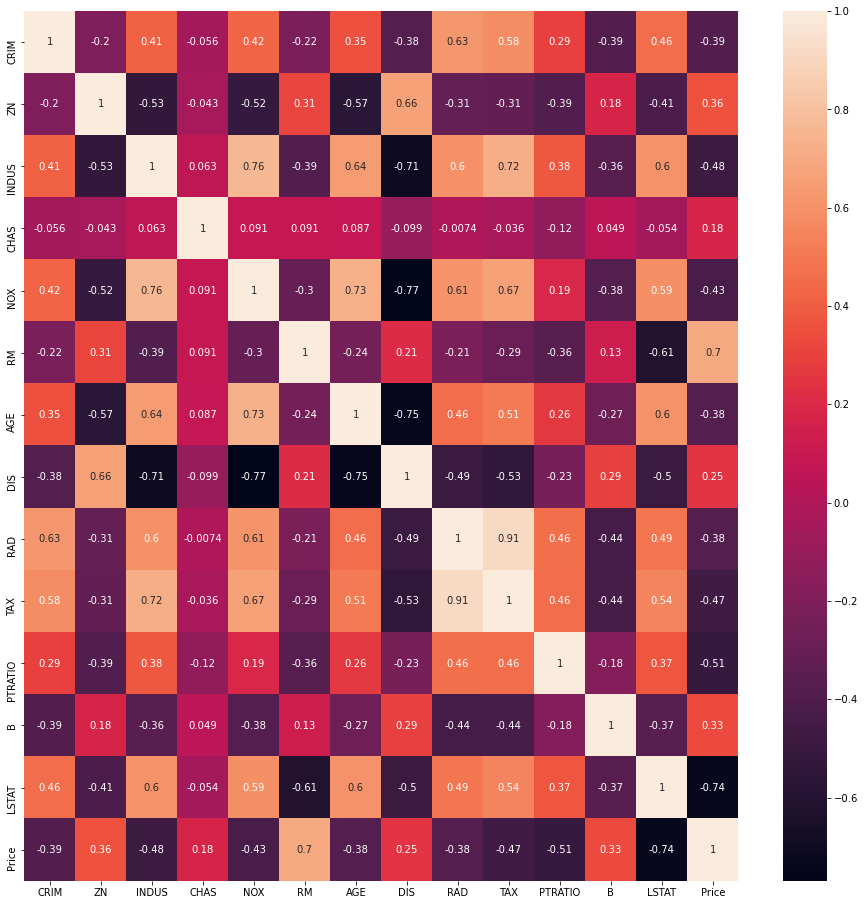

In [85]:
fig=plt.figure(figsize=(16,16))
fig.add_subplot(1,1,1)
sns.heatmap(boston_df.corr(),annot=True)
plt.show()

In [86]:
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df


In [91]:
threshold=0.50
corr_value=getCorrelatedFeature(cormmat['Price'],threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [92]:
correlated_data=boston_df[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


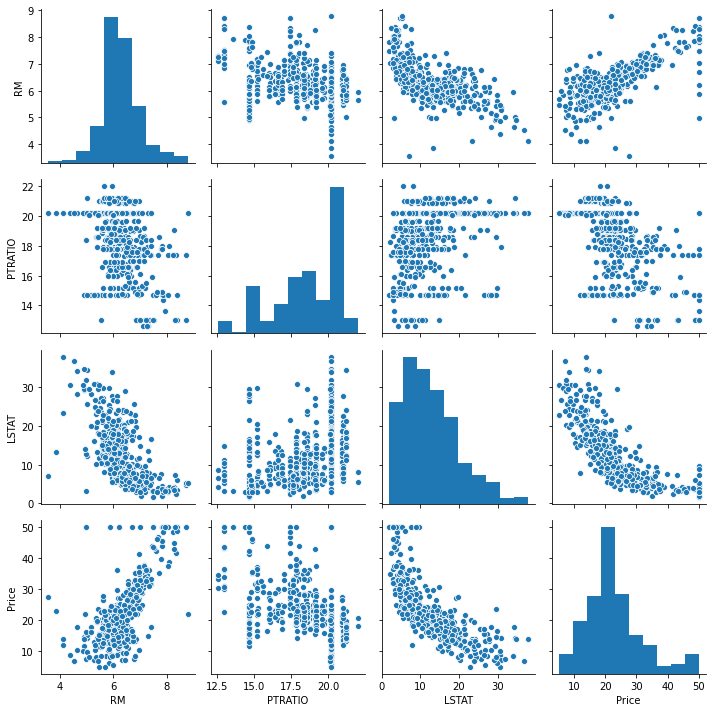

In [93]:
sns.pairplot(correlated_data)
plt.tight_layout()

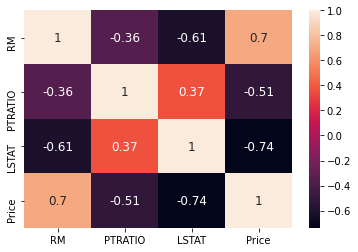

In [95]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'Size':12})
plt.show()

In [96]:
x=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']

In [101]:
x.describe()

,RM,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000
mean,6.284634,18.455534,12.653063
std,0.702617,2.164946,7.141062
min,3.561000,12.600000,1.730000
25%,5.885500,17.400000,6.950000
50%,6.208500,19.050000,11.360000
75%,6.623500,20.200000,16.955000
max,8.780000,22.000000,37.970000


In [98]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
X_train.shape,X_test.shape

((404, 3), (102, 3))

In [103]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [104]:
y_predict=model.predict(X_test)

In [106]:
df=pd.DataFrame(data=[y_predict,Y_test])

In [108]:
df.T.head()

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2


In [110]:
score=r2_score(Y_test,y_predict)
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)

print('R2 score:- ',score)
print('Mean Absolute Error ',mae)
print('Mean squared Error :- ', mse)

R2 score:-  0.4881642015692508
Mean Absolute Error  4.404434993909256
Mean squared Error :-  41.67799012221682
